# Rainfall Prediction by Galav Bhatt

In [1]:
pip install -U imbalanced-learn

Requirement already up-to-date: imbalanced-learn in c:\users\dell\anaconda3\lib\site-packages (0.8.0)
Note: you may need to restart the kernel to use updated packages.


In [2]:
!pip3 install catboost

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
import scipy.stats as stats
from sklearn.model_selection import train_test_split
from collections import Counter
from imblearn.over_sampling import SMOTE
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
import joblib

In [4]:
df = pd.read_csv("weatherAUS.csv")
pd.set_option("display.max_columns", None)
df

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,0.0,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,0.0,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,0.0,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,1.0,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,0.2,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
142188,2017-06-20,Uluru,3.5,21.8,0.0,NaN,NaN,E,31.0,ESE,E,15.0,13.0,59.0,27.0,1024.7,1021.2,NaN,NaN,9.4,20.9,No,0.0,No
142189,2017-06-21,Uluru,2.8,23.4,0.0,NaN,NaN,E,31.0,SE,ENE,13.0,11.0,51.0,24.0,1024.6,1020.3,NaN,NaN,10.1,22.4,No,0.0,No
142190,2017-06-22,Uluru,3.6,25.3,0.0,NaN,NaN,NNW,22.0,SE,N,13.0,9.0,56.0,21.0,1023.5,1019.1,NaN,NaN,10.9,24.5,No,0.0,No
142191,2017-06-23,Uluru,5.4,26.9,0.0,NaN,NaN,N,37.0,SE,WNW,9.0,9.0,53.0,24.0,1021.0,1016.8,NaN,NaN,12.5,26.1,No,0.0,No


In [5]:
numerical_feature = [feature for feature in df.columns if df[feature].dtypes != 'O']
discrete_feature=[feature for feature in numerical_feature if len(df[feature].unique())<25]
continuous_feature = [feature for feature in numerical_feature if feature not in discrete_feature]
categorical_feature = [feature for feature in df.columns if feature not in numerical_feature]
print("Numerical Features Count {}".format(len(numerical_feature)))
print("Discrete feature Count {}".format(len(discrete_feature)))
print("Continuous feature Count {}".format(len(continuous_feature)))
print("Categorical feature Count {}".format(len(categorical_feature)))

Numerical Features Count 17
Discrete feature Count 2
Continuous feature Count 15
Categorical feature Count 7


In [6]:
len(df)

142193

In [7]:
df.isnull().sum()*100/len(df)

Date              0.000000
Location          0.000000
MinTemp           0.447983
MaxTemp           0.226453
Rainfall          0.988797
Evaporation      42.789026
Sunshine         47.692924
WindGustDir       6.561504
WindGustSpeed     6.519308
WindDir9am        7.041838
WindDir3pm        2.656952
WindSpeed9am      0.948007
WindSpeed3pm      1.849599
Humidity9am       1.247600
Humidity3pm       2.538803
Pressure9am       9.855619
Pressure3pm       9.832411
Cloud9am         37.735332
Cloud3pm         40.152469
Temp9am           0.635756
Temp3pm           1.917113
RainToday         0.988797
RISK_MM           0.000000
RainTomorrow      0.000000
dtype: float64

In [8]:
print(numerical_feature)

['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm', 'RISK_MM']


In [9]:
def randomsampleimputation(df, variable):
    df[variable]=df[variable]
    random_sample=df[variable].dropna().sample(df[variable].isnull().sum(),random_state=0)
    random_sample.index=df[df[variable].isnull()].index
    df.loc[df[variable].isnull(),variable]=random_sample

In [10]:
randomsampleimputation(df, "Cloud9am")
randomsampleimputation(df, "Cloud3pm")
randomsampleimputation(df, "Evaporation")
randomsampleimputation(df, "Sunshine")

In [11]:
df

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,6.2,3.3,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,5.0,16.9,21.8,No,0.0,No
1,2008-12-02,Albury,7.4,25.1,0.0,0.4,6.1,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,5.0,1.0,17.2,24.3,No,0.0,No
2,2008-12-03,Albury,12.9,25.7,0.0,5.8,9.7,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,1.0,2.0,21.0,23.2,No,0.0,No
3,2008-12-04,Albury,9.2,28.0,0.0,1.4,12.2,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,7.0,7.0,18.1,26.5,No,1.0,No
4,2008-12-05,Albury,17.5,32.3,1.0,6.6,1.0,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,0.2,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
142188,2017-06-20,Uluru,3.5,21.8,0.0,16.0,6.6,E,31.0,ESE,E,15.0,13.0,59.0,27.0,1024.7,1021.2,7.0,7.0,9.4,20.9,No,0.0,No
142189,2017-06-21,Uluru,2.8,23.4,0.0,1.0,11.4,E,31.0,SE,ENE,13.0,11.0,51.0,24.0,1024.6,1020.3,1.0,8.0,10.1,22.4,No,0.0,No
142190,2017-06-22,Uluru,3.6,25.3,0.0,6.7,2.4,NNW,22.0,SE,N,13.0,9.0,56.0,21.0,1023.5,1019.1,7.0,0.0,10.9,24.5,No,0.0,No
142191,2017-06-23,Uluru,5.4,26.9,0.0,5.6,0.0,N,37.0,SE,WNW,9.0,9.0,53.0,24.0,1021.0,1016.8,0.0,8.0,12.5,26.1,No,0.0,No


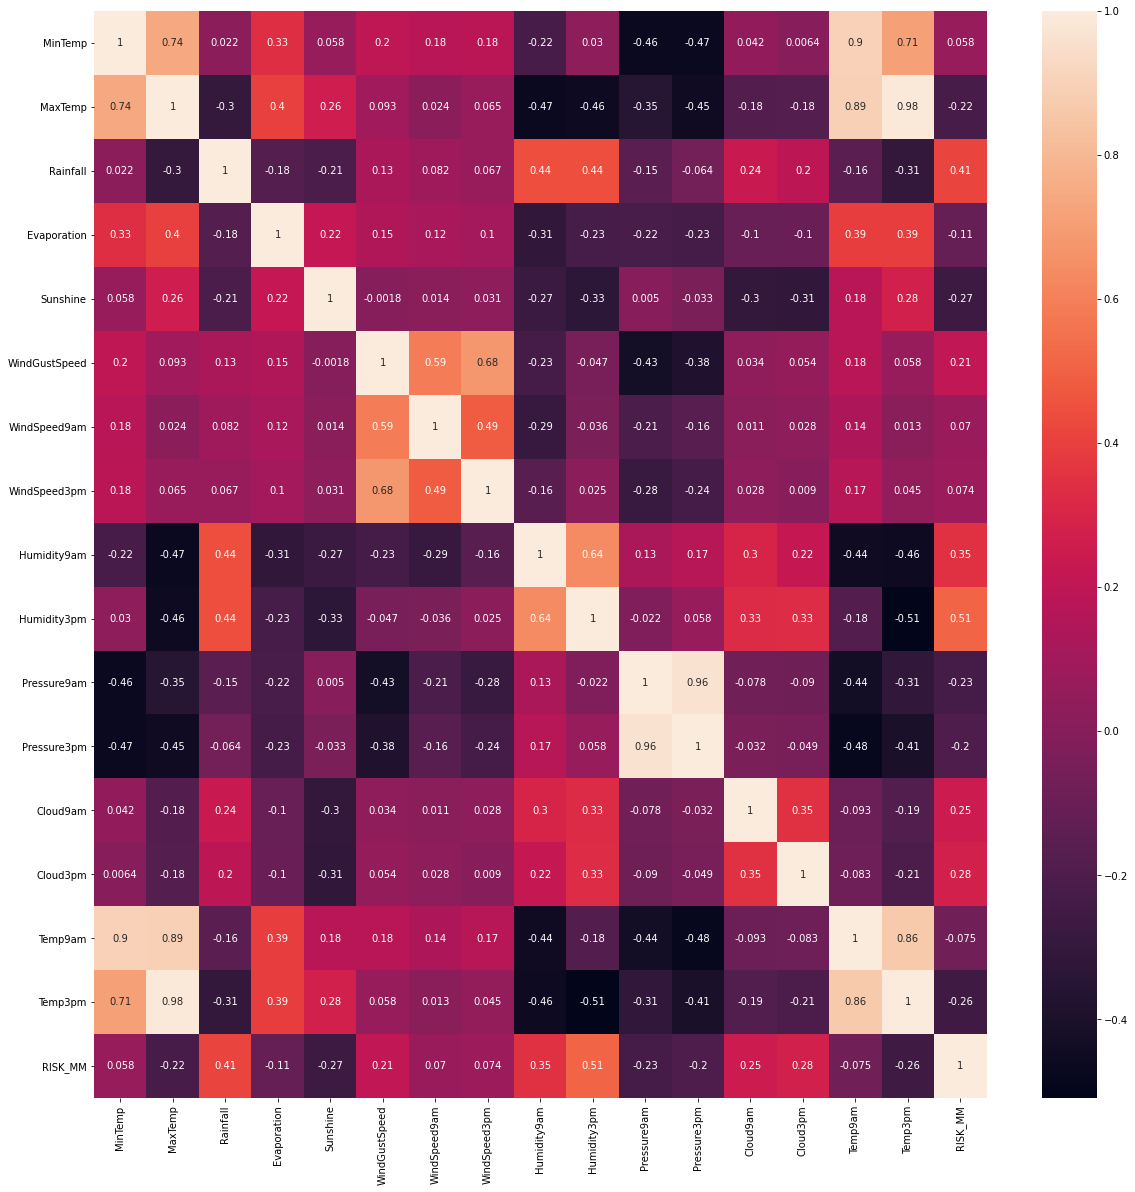

In [12]:
corrmat = df.corr(method = "spearman")
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(corrmat,annot=True)


C:\Users\Dell\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


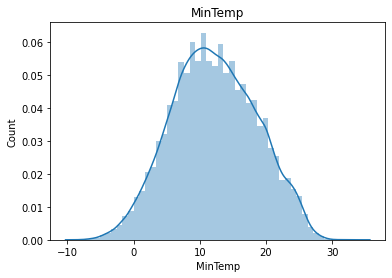

<Figure size 1080x1080 with 0 Axes>

C:\Users\Dell\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


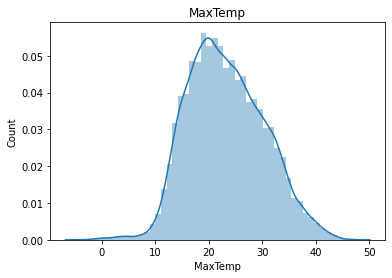

<Figure size 1080x1080 with 0 Axes>

C:\Users\Dell\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


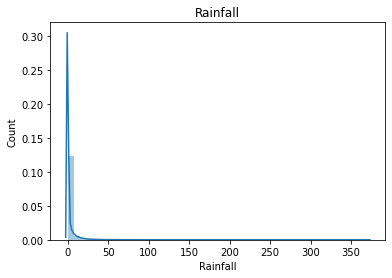

<Figure size 1080x1080 with 0 Axes>

C:\Users\Dell\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


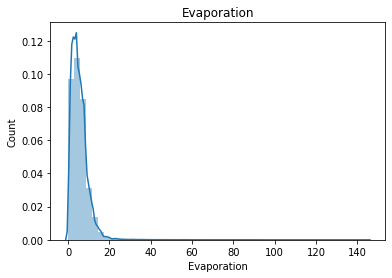

<Figure size 1080x1080 with 0 Axes>

C:\Users\Dell\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


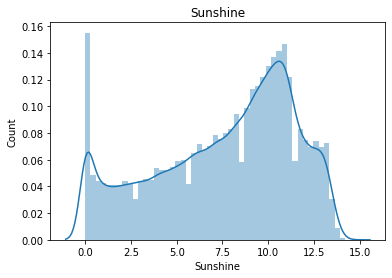

<Figure size 1080x1080 with 0 Axes>

C:\Users\Dell\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


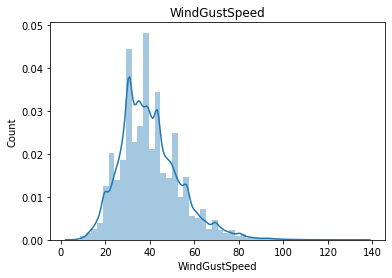

<Figure size 1080x1080 with 0 Axes>

C:\Users\Dell\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


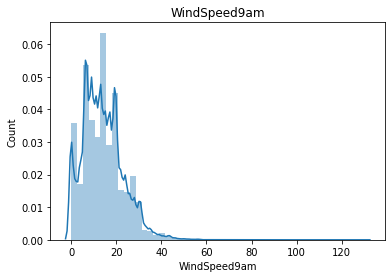

<Figure size 1080x1080 with 0 Axes>

C:\Users\Dell\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


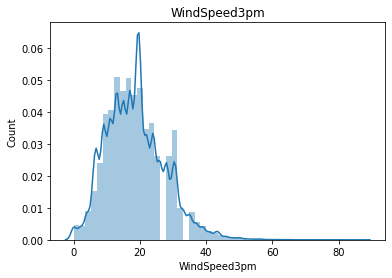

<Figure size 1080x1080 with 0 Axes>

C:\Users\Dell\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


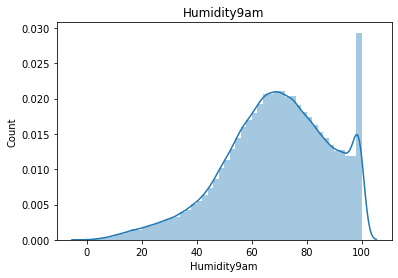

<Figure size 1080x1080 with 0 Axes>

C:\Users\Dell\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


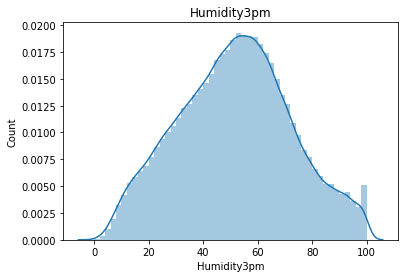

<Figure size 1080x1080 with 0 Axes>

C:\Users\Dell\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


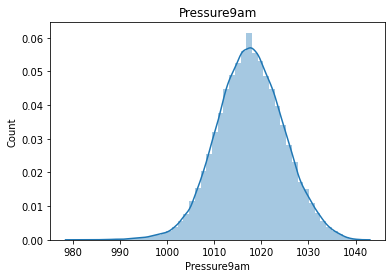

<Figure size 1080x1080 with 0 Axes>

C:\Users\Dell\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


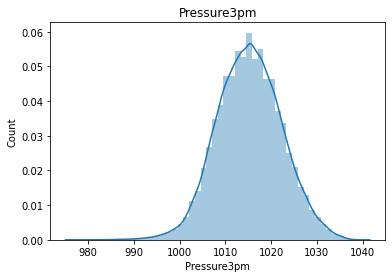

<Figure size 1080x1080 with 0 Axes>

C:\Users\Dell\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


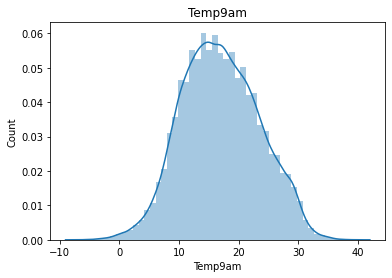

<Figure size 1080x1080 with 0 Axes>

C:\Users\Dell\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


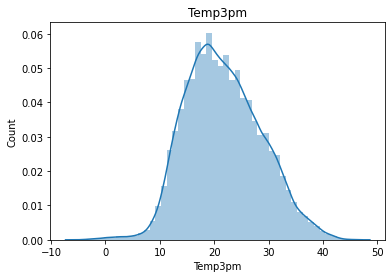

<Figure size 1080x1080 with 0 Axes>

C:\Users\Dell\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


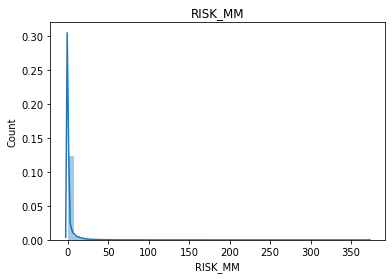

<Figure size 1080x1080 with 0 Axes>

In [13]:
for feature in continuous_feature:
    data=df.copy()
    sns.distplot(df[feature])
    plt.xlabel(feature)
    plt.ylabel("Count")
    plt.title(feature)
    plt.figure(figsize=(15,15))
    plt.show()

C:\Users\Dell\anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\Users\Dell\anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\Users\Dell\anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\Users\Dell\anaconda3\lib\site-pack

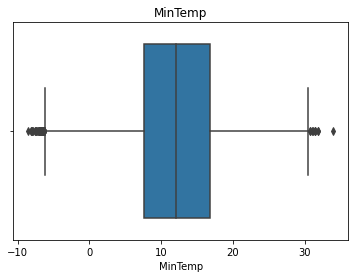

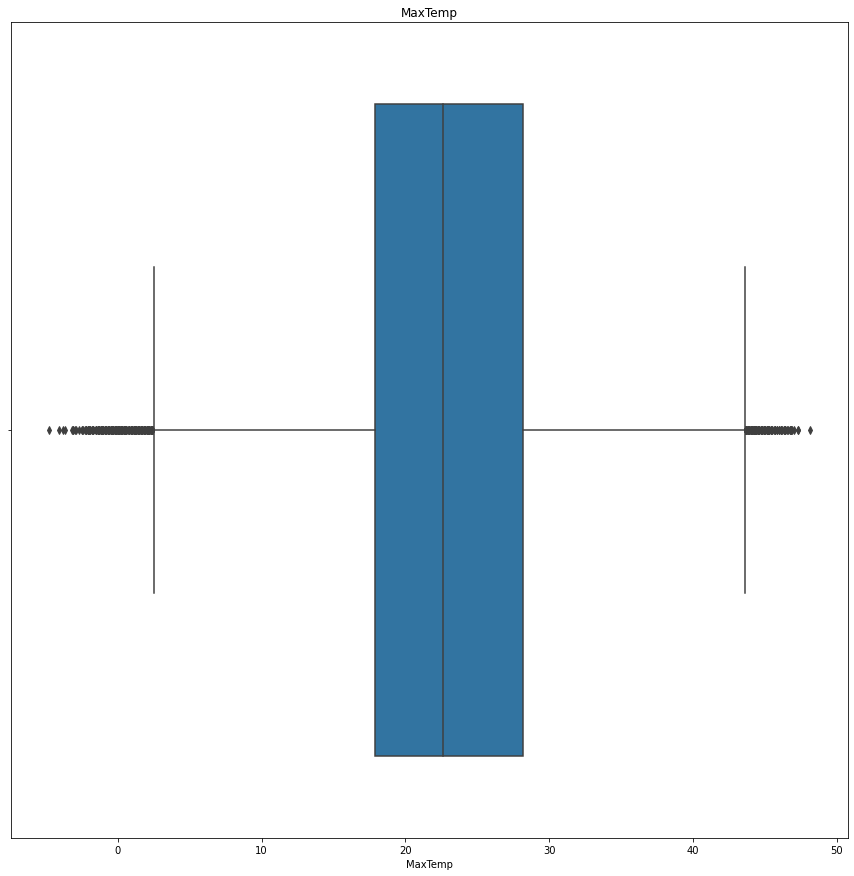

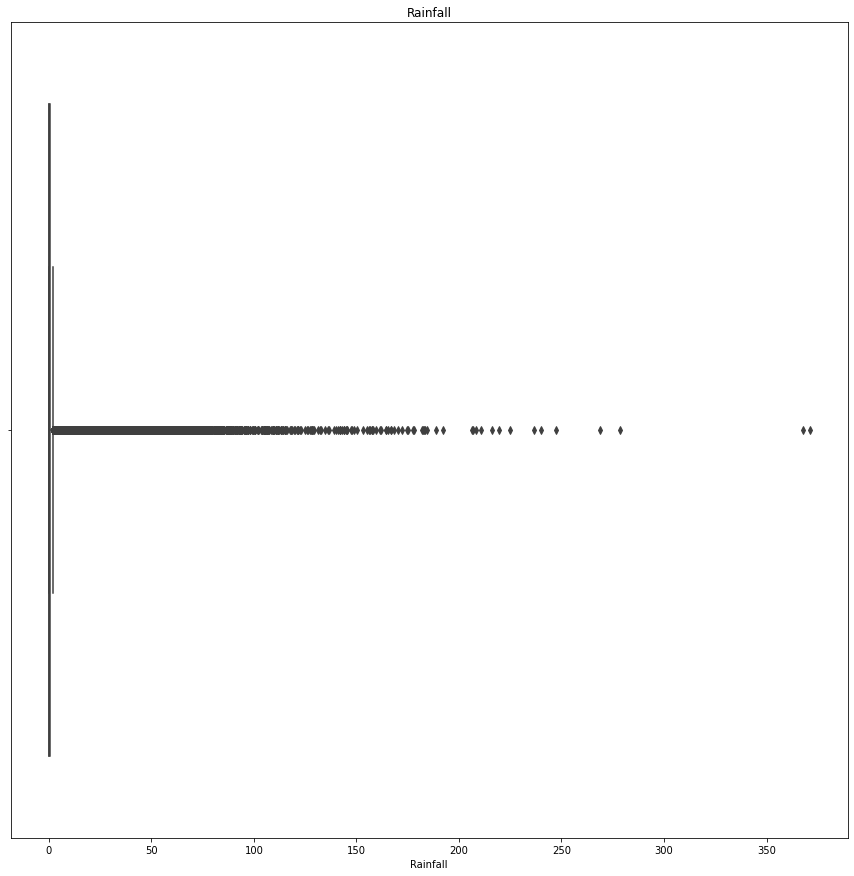

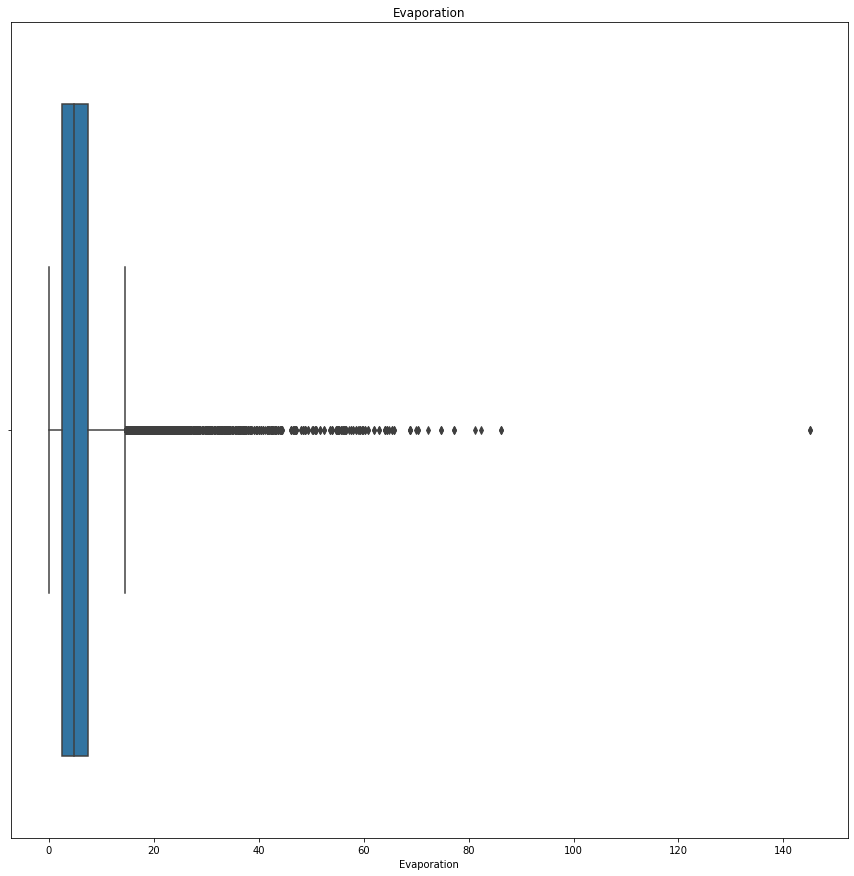

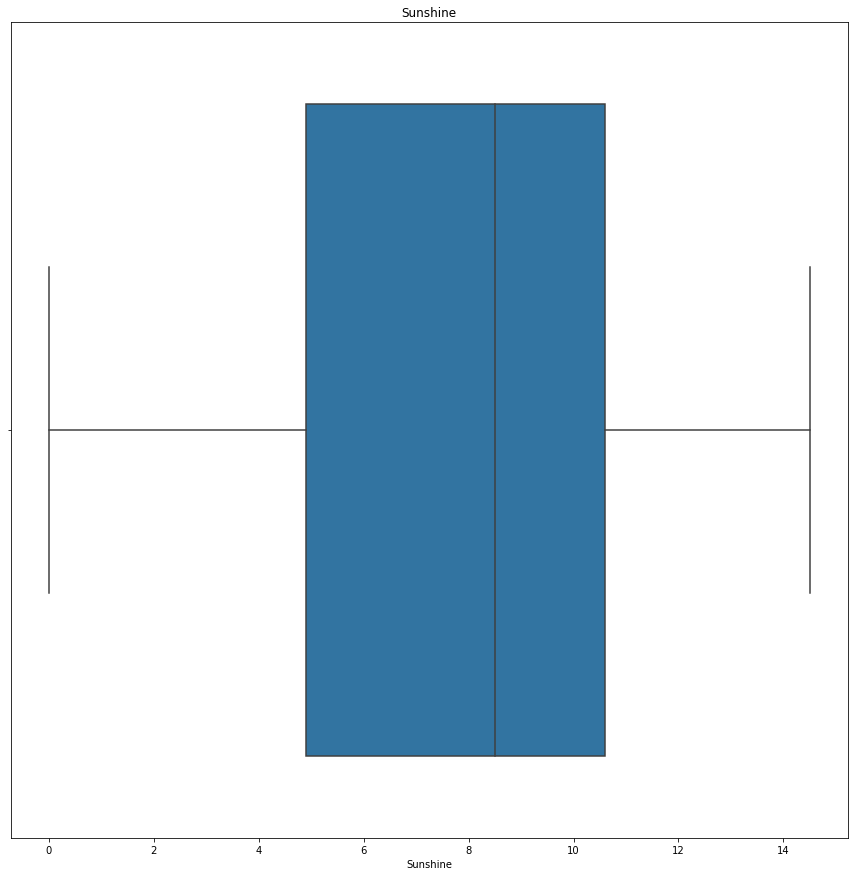

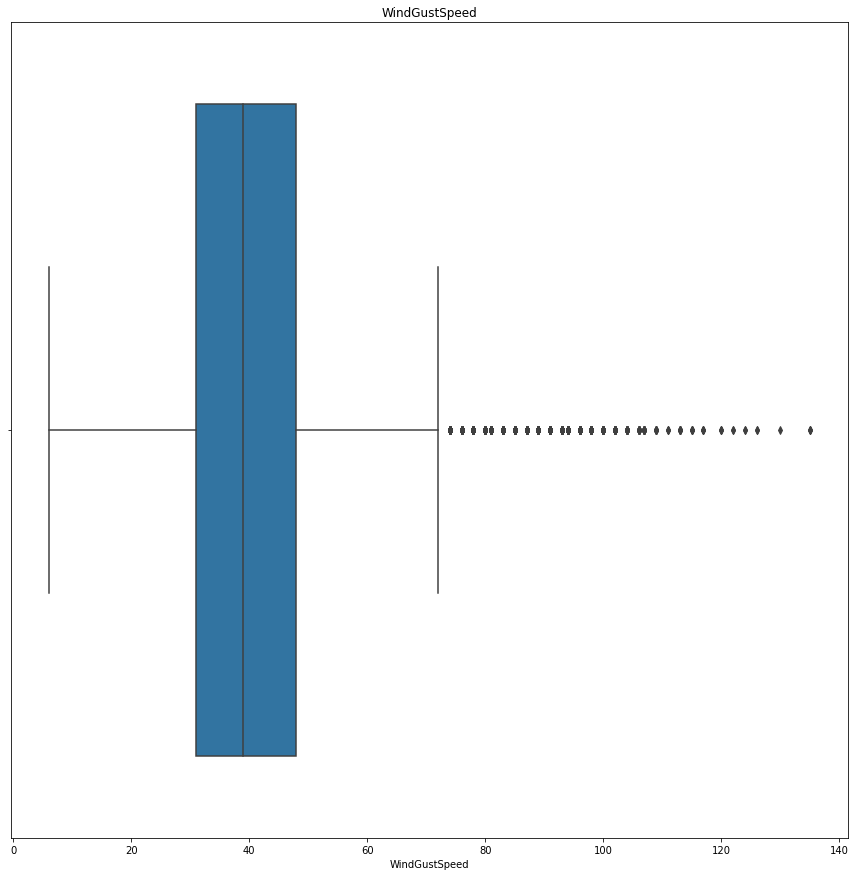

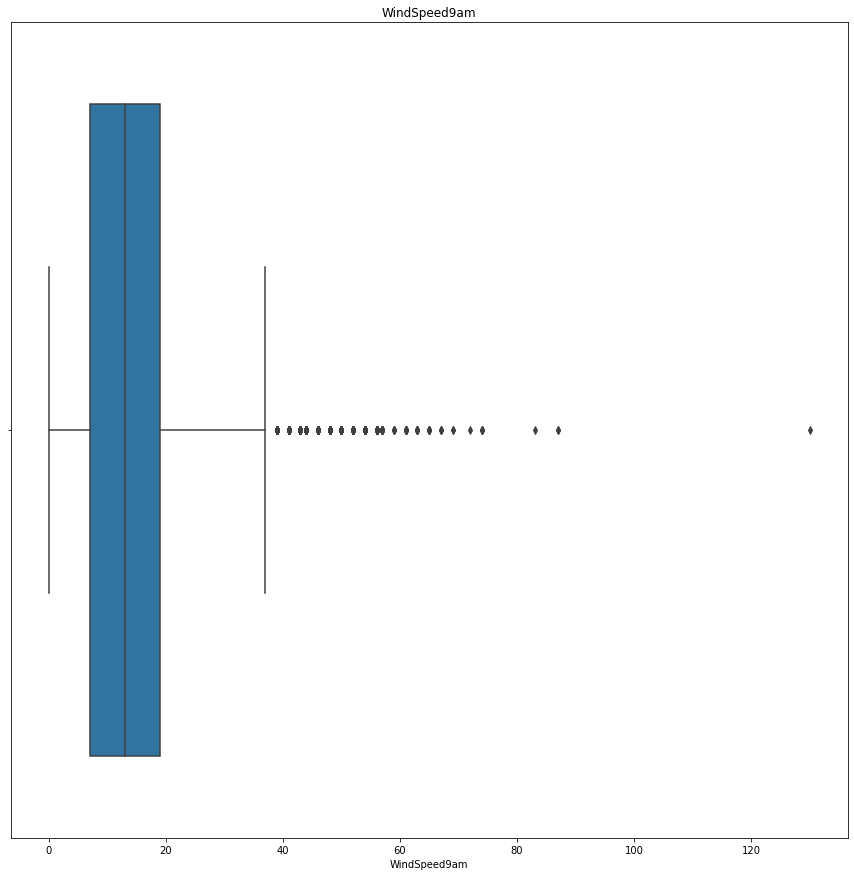

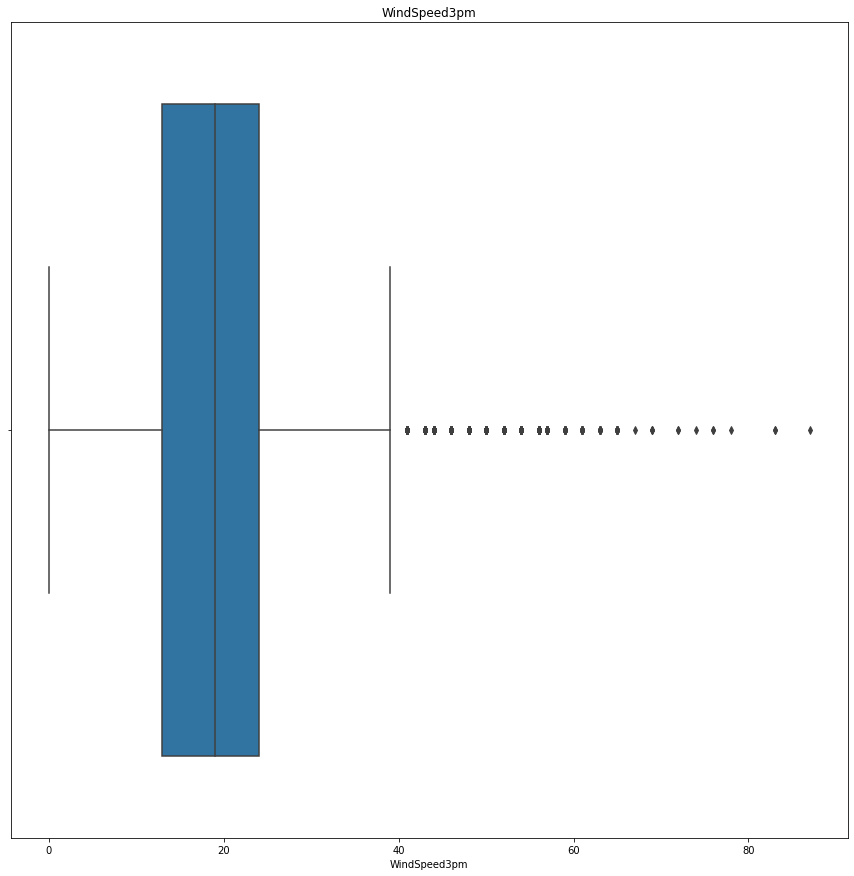

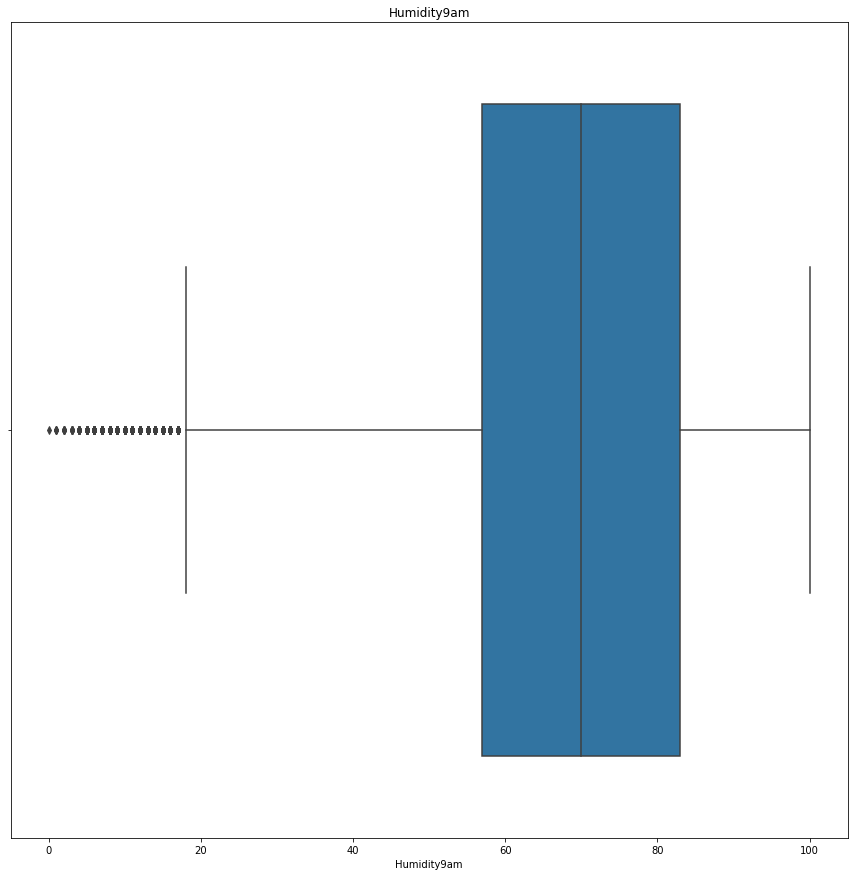

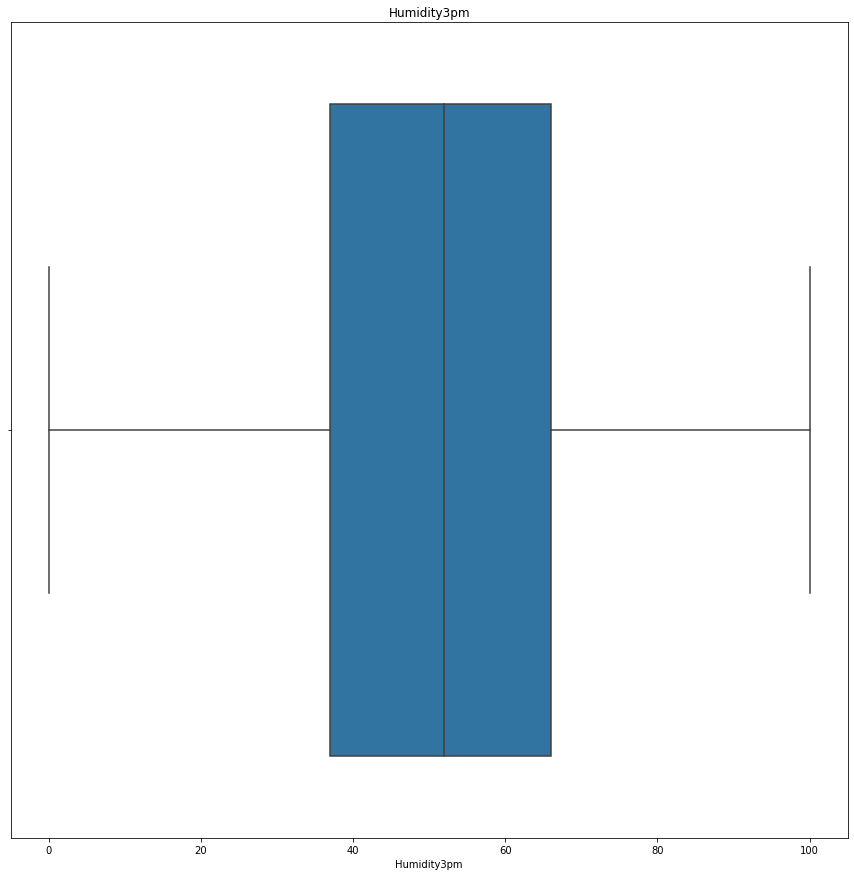

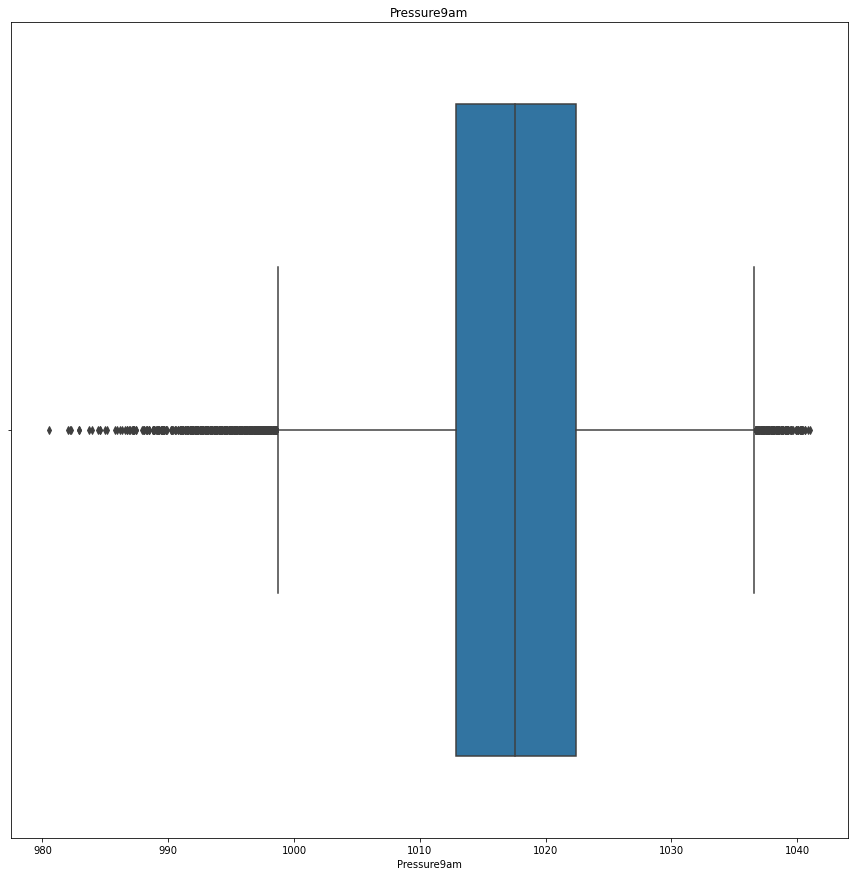

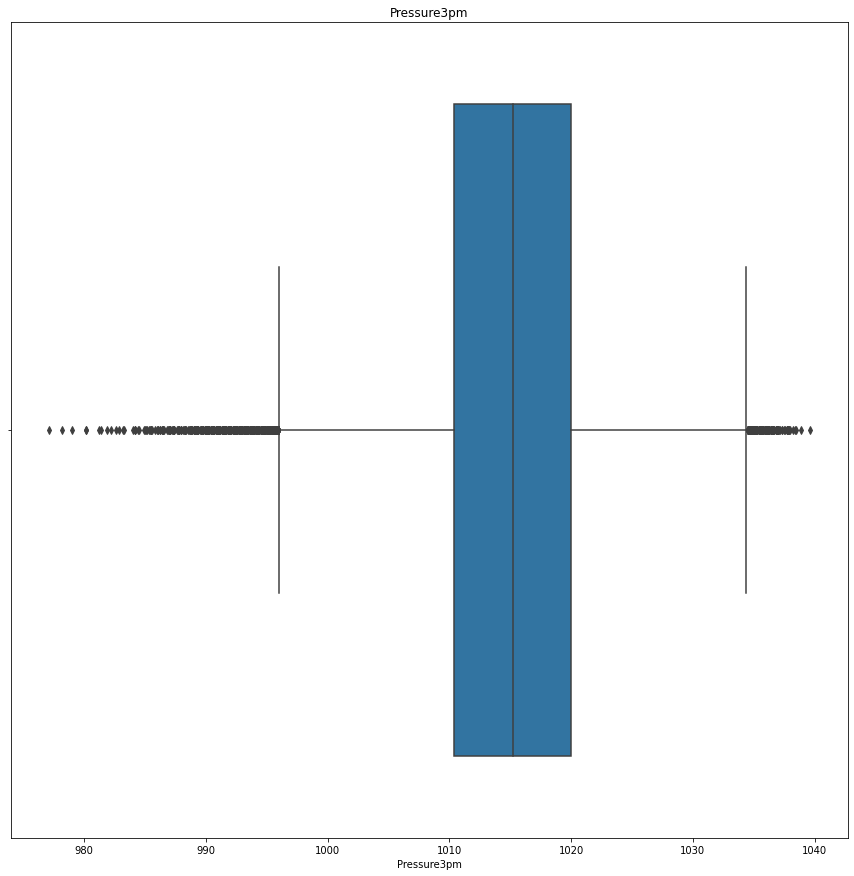

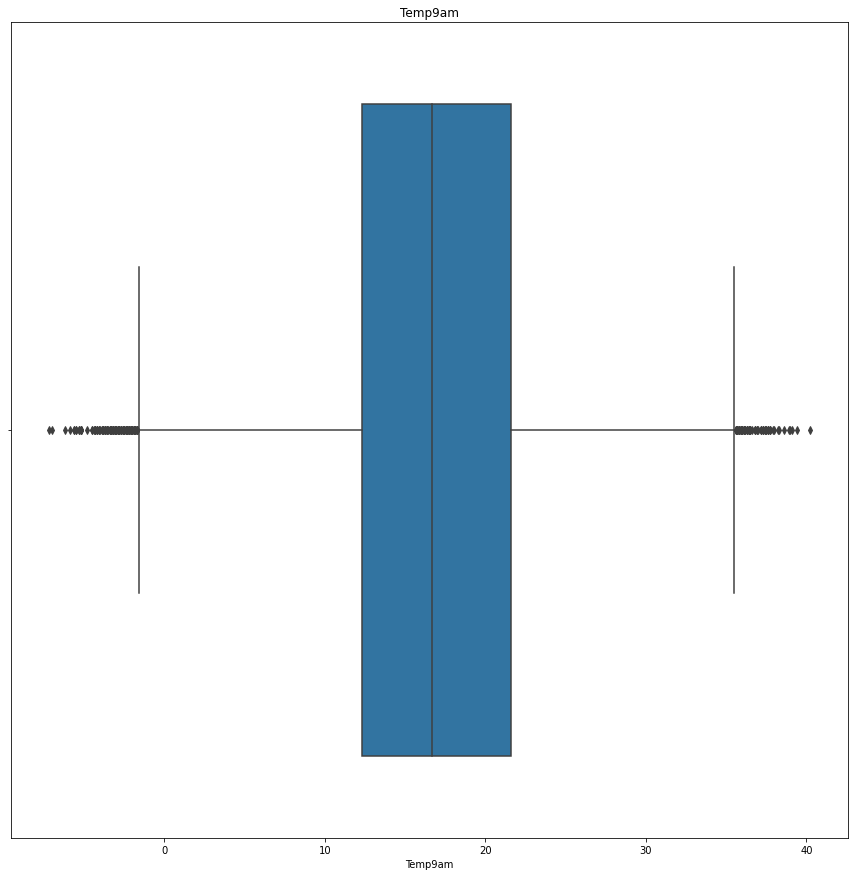

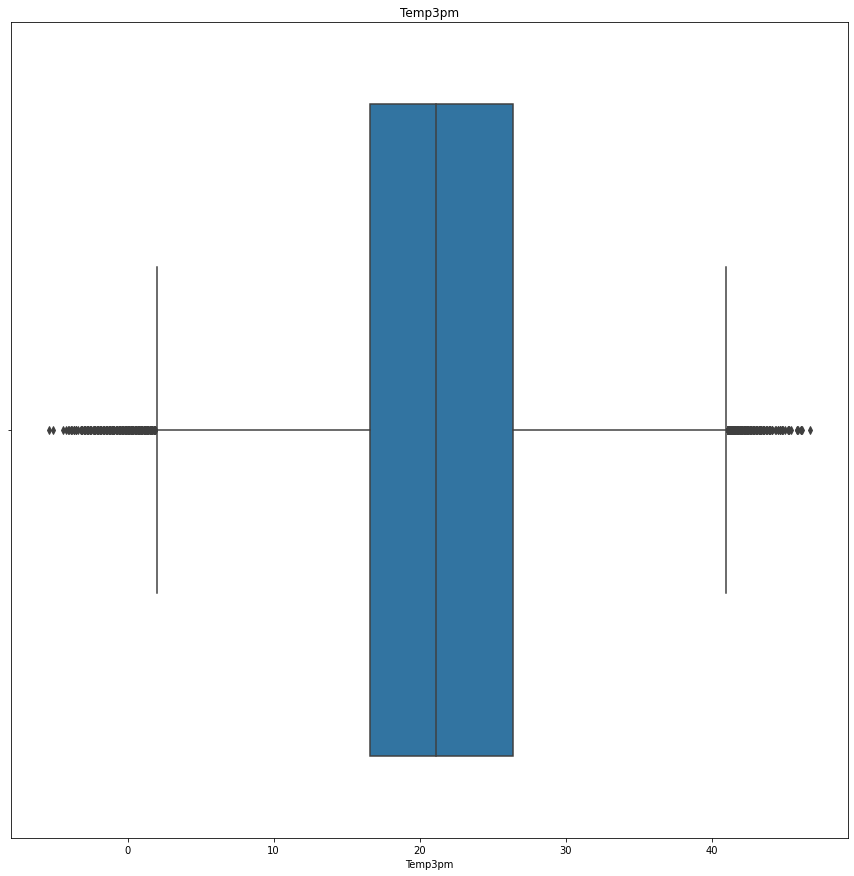

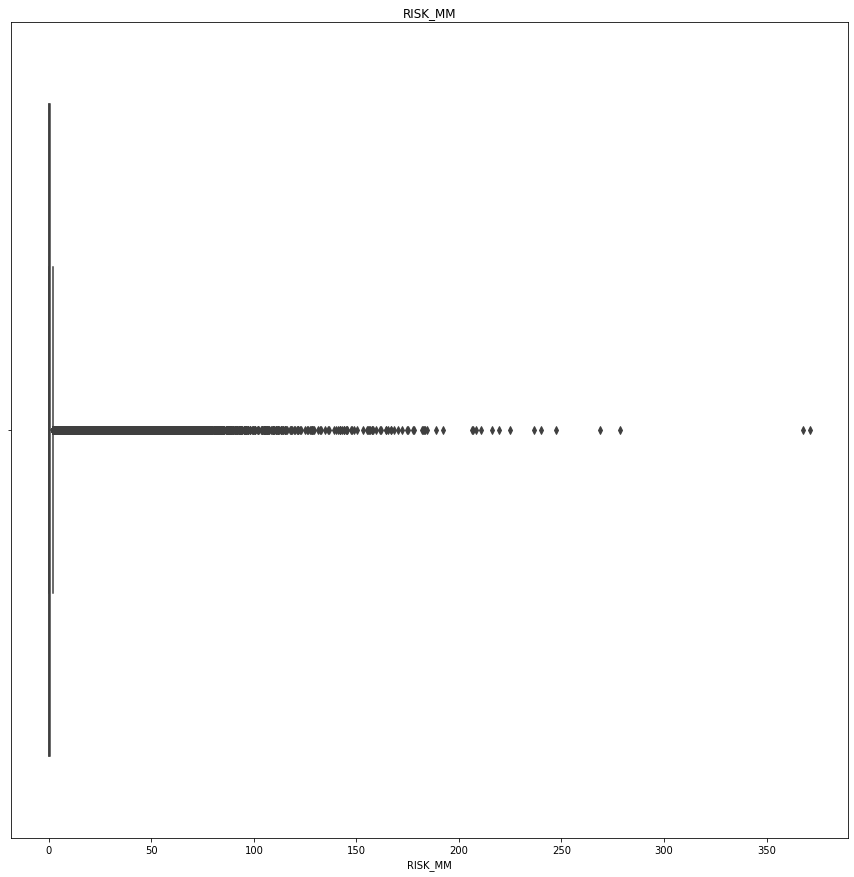

<Figure size 1080x1080 with 0 Axes>

In [14]:
#A for loop is used to plot a boxplot for all the continuous features to see the outliers
for feature in continuous_feature:
    data=df.copy()
    sns.boxplot(data[feature])
    plt.title(feature)
    plt.figure(figsize=(15,15))

In [15]:
for feature in continuous_feature:
    if(df[feature].isnull().sum()*100/len(df))>0:
        df[feature] = df[feature].fillna(df[feature].median())

In [16]:
df.isnull().sum()*100/len(df)

Date             0.000000
Location         0.000000
MinTemp          0.000000
MaxTemp          0.000000
Rainfall         0.000000
Evaporation      0.000000
Sunshine         0.000000
WindGustDir      6.561504
WindGustSpeed    0.000000
WindDir9am       7.041838
WindDir3pm       2.656952
WindSpeed9am     0.000000
WindSpeed3pm     0.000000
Humidity9am      0.000000
Humidity3pm      0.000000
Pressure9am      0.000000
Pressure3pm      0.000000
Cloud9am         0.000000
Cloud3pm         0.000000
Temp9am          0.000000
Temp3pm          0.000000
RainToday        0.988797
RISK_MM          0.000000
RainTomorrow     0.000000
dtype: float64

In [17]:
discrete_feature

['Cloud9am', 'Cloud3pm']

In [18]:
def mode_nan(df,variable):
    mode=df[variable].value_counts().index[0]
    df[variable].fillna(mode,inplace=True)
mode_nan(df,"Cloud9am")
mode_nan(df,"Cloud3pm")

In [19]:
df["RainToday"] = pd.get_dummies(df["RainToday"], drop_first = True)
df["RainTomorrow"] = pd.get_dummies(df["RainTomorrow"], drop_first = True)
df

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,6.2,3.3,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,5.0,16.9,21.8,0,0.0,0
1,2008-12-02,Albury,7.4,25.1,0.0,0.4,6.1,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,5.0,1.0,17.2,24.3,0,0.0,0
2,2008-12-03,Albury,12.9,25.7,0.0,5.8,9.7,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,1.0,2.0,21.0,23.2,0,0.0,0
3,2008-12-04,Albury,9.2,28.0,0.0,1.4,12.2,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,7.0,7.0,18.1,26.5,0,1.0,0
4,2008-12-05,Albury,17.5,32.3,1.0,6.6,1.0,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,0,0.2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
142188,2017-06-20,Uluru,3.5,21.8,0.0,16.0,6.6,E,31.0,ESE,E,15.0,13.0,59.0,27.0,1024.7,1021.2,7.0,7.0,9.4,20.9,0,0.0,0
142189,2017-06-21,Uluru,2.8,23.4,0.0,1.0,11.4,E,31.0,SE,ENE,13.0,11.0,51.0,24.0,1024.6,1020.3,1.0,8.0,10.1,22.4,0,0.0,0
142190,2017-06-22,Uluru,3.6,25.3,0.0,6.7,2.4,NNW,22.0,SE,N,13.0,9.0,56.0,21.0,1023.5,1019.1,7.0,0.0,10.9,24.5,0,0.0,0
142191,2017-06-23,Uluru,5.4,26.9,0.0,5.6,0.0,N,37.0,SE,WNW,9.0,9.0,53.0,24.0,1021.0,1016.8,0.0,8.0,12.5,26.1,0,0.0,0


In [20]:
for feature in categorical_feature:
    print(feature, (df.groupby([feature])["RainTomorrow"].mean().sort_values(ascending = False)).index)

Date Index(['2007-11-01', '2007-12-27', '2007-12-01', '2008-04-13', '2007-12-03',
       '2008-03-25', '2008-03-07', '2007-12-07', '2008-02-28', '2008-02-12',
       ...
       '2007-12-26', '2011-10-11', '2008-04-30', '2007-12-25', '2008-05-01',
       '2008-05-02', '2008-05-03', '2008-05-04', '2008-05-05', '2008-05-24'],
      dtype='object', name='Date', length=3436)
Location Index(['Portland', 'Walpole', 'Cairns', 'Dartmoor', 'NorfolkIsland',
       'MountGambier', 'Albany', 'Witchcliffe', 'CoffsHarbour', 'MountGinini',
       'NorahHead', 'Williamtown', 'Darwin', 'Melbourne', 'GoldCoast',
       'Sydney', 'Ballarat', 'SydneyAirport', 'Newcastle', 'Watsonia',
       'Wollongong', 'Hobart', 'Launceston', 'Brisbane', 'Adelaide',
       'MelbourneAirport', 'Sale', 'Albury', 'Perth', 'Penrith',
       'BadgerysCreek', 'Nuriootpa', 'Richmond', 'Tuggeranong', 'PerthAirport',
       'Bendigo', 'Canberra', 'PearceRAAF', 'WaggaWagga', 'Townsville',
       'Katherine', 'SalmonGums', 'Nhil', 

In [21]:
windgustdir = {'NNW':0, 'NW':1, 'WNW':2, 'N':3, 'W':4, 'WSW':5, 'NNE':6, 'S':7, 'SSW':8, 'SW':9, 'SSE':10,
       'NE':11, 'SE':12, 'ESE':13, 'ENE':14, 'E':15}
winddir9am = {'NNW':0, 'N':1, 'NW':2, 'NNE':3, 'WNW':4, 'W':5, 'WSW':6, 'SW':7, 'SSW':8, 'NE':9, 'S':10,
       'SSE':11, 'ENE':12, 'SE':13, 'ESE':14, 'E':15}
winddir3pm = {'NW':0, 'NNW':1, 'N':2, 'WNW':3, 'W':4, 'NNE':5, 'WSW':6, 'SSW':7, 'S':8, 'SW':9, 'SE':10,
       'NE':11, 'SSE':12, 'ENE':13, 'E':14, 'ESE':15}
df["WindGustDir"] = df["WindGustDir"].map(windgustdir)
df["WindDir9am"] = df["WindDir9am"].map(winddir9am)
df["WindDir3pm"] = df["WindDir3pm"].map(winddir3pm)

In [22]:
df["WindGustDir"] = df["WindGustDir"].fillna(df["WindGustDir"].value_counts().index[0])
df["WindDir9am"] = df["WindDir9am"].fillna(df["WindDir9am"].value_counts().index[0])
df["WindDir3pm"] = df["WindDir3pm"].fillna(df["WindDir3pm"].value_counts().index[0])

In [23]:
df["WindGustDir"].value_counts()

4.0     19110
12.0     9309
15.0     9071
3.0      9033
10.0     8993
7.0      8949
5.0      8901
9.0      8797
8.0      8610
2.0      8066
1.0      8003
14.0     7992
13.0     7305
11.0     7060
0.0      6561
6.0      6433
Name: WindGustDir, dtype: int64

In [24]:
df["WindGustDir"].value_counts().index[0]

4.0

In [25]:
df.isnull().sum()*100/len(df)

Date             0.0
Location         0.0
MinTemp          0.0
MaxTemp          0.0
Rainfall         0.0
Evaporation      0.0
Sunshine         0.0
WindGustDir      0.0
WindGustSpeed    0.0
WindDir9am       0.0
WindDir3pm       0.0
WindSpeed9am     0.0
WindSpeed3pm     0.0
Humidity9am      0.0
Humidity3pm      0.0
Pressure9am      0.0
Pressure3pm      0.0
Cloud9am         0.0
Cloud3pm         0.0
Temp9am          0.0
Temp3pm          0.0
RainToday        0.0
RISK_MM          0.0
RainTomorrow     0.0
dtype: float64

In [26]:
df.groupby(["Location"])["RainTomorrow"].value_counts()

Location     RainTomorrow
Adelaide     0               2402
             1                688
Albany       0               2114
             1                902
Albury       0               2393
                             ... 
Witchcliffe  1                879
Wollongong   0               2270
             1                713
Woomera      0               2788
             1                202
Name: RainTomorrow, Length: 98, dtype: int64

In [27]:
df1 = df.groupby(["Location"])["RainTomorrow"].value_counts().sort_values().unstack()

In [28]:
df1

RainTomorrow,0,1
Location,,
Adelaide,2402,688
Albany,2114,902
Albury,2393,618
AliceSprings,2787,244
BadgerysCreek,2345,583
Ballarat,2247,781
Bendigo,2472,562
Brisbane,2452,709
Cairns,2038,950


In [29]:
df1[1]

Location
Adelaide             688
Albany               902
Albury               618
AliceSprings         244
BadgerysCreek        583
Ballarat             781
Bendigo              562
Brisbane             709
Cairns               950
Canberra             629
Cobar                386
CoffsHarbour         869
Dartmoor             922
Darwin               852
GoldCoast            775
Hobart               761
Katherine            265
Launceston           699
Melbourne            636
MelbourneAirport     653
Mildura              327
Moree                394
MountGambier         920
MountGinini          819
Newcastle            731
Nhil                 242
NorahHead            808
NorfolkIsland        919
Nuriootpa            592
PearceRAAF           505
Penrith              595
Perth                645
PerthAirport         567
Portland            1095
Richmond             560
Sale                 643
SalmonGums           472
Sydney               865
SydneyAirport        774
Townsville      

In [30]:
df1[1].sort_values(ascending = False).index

Index(['Portland', 'Cairns', 'Walpole', 'Dartmoor', 'MountGambier',
       'NorfolkIsland', 'Albany', 'Witchcliffe', 'CoffsHarbour', 'Sydney',
       'Darwin', 'MountGinini', 'NorahHead', 'Ballarat', 'GoldCoast',
       'SydneyAirport', 'Hobart', 'Watsonia', 'Newcastle', 'Wollongong',
       'Brisbane', 'Williamtown', 'Launceston', 'Adelaide', 'MelbourneAirport',
       'Perth', 'Sale', 'Melbourne', 'Canberra', 'Albury', 'Penrith',
       'Nuriootpa', 'BadgerysCreek', 'Tuggeranong', 'PerthAirport', 'Bendigo',
       'Richmond', 'WaggaWagga', 'Townsville', 'PearceRAAF', 'SalmonGums',
       'Moree', 'Cobar', 'Mildura', 'Katherine', 'AliceSprings', 'Nhil',
       'Woomera', 'Uluru'],
      dtype='object', name='Location')

In [31]:
len(df1[1].sort_values(ascending = False).index)

49

In [32]:
location = {'Portland':1, 'Cairns':2, 'Walpole':3, 'Dartmoor':4, 'MountGambier':5,
       'NorfolkIsland':6, 'Albany':7, 'Witchcliffe':8, 'CoffsHarbour':9, 'Sydney':10,
       'Darwin':11, 'MountGinini':12, 'NorahHead':13, 'Ballarat':14, 'GoldCoast':15,
       'SydneyAirport':16, 'Hobart':17, 'Watsonia':18, 'Newcastle':19, 'Wollongong':20,
       'Brisbane':21, 'Williamtown':22, 'Launceston':23, 'Adelaide':24, 'MelbourneAirport':25,
       'Perth':26, 'Sale':27, 'Melbourne':28, 'Canberra':29, 'Albury':30, 'Penrith':31,
       'Nuriootpa':32, 'BadgerysCreek':33, 'Tuggeranong':34, 'PerthAirport':35, 'Bendigo':36,
       'Richmond':37, 'WaggaWagga':38, 'Townsville':39, 'PearceRAAF':40, 'SalmonGums':41,
       'Moree':42, 'Cobar':43, 'Mildura':44, 'Katherine':45, 'AliceSprings':46, 'Nhil':47,
       'Woomera':48, 'Uluru':49}
df["Location"] = df["Location"].map(location)

In [33]:
df["Date"] = pd.to_datetime(df["Date"], format = "%Y-%m-%dT", errors = "coerce")

In [34]:
df["Date_month"] = df["Date"].dt.month
df["Date_day"] = df["Date"].dt.day

In [35]:
df

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow,Date_month,Date_day
0,2008-12-01,30,13.4,22.9,0.6,6.2,3.3,4.0,44.0,5.0,3.0,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,5.0,16.9,21.8,0,0.0,0,12,1
1,2008-12-02,30,7.4,25.1,0.0,0.4,6.1,2.0,44.0,0.0,6.0,4.0,22.0,44.0,25.0,1010.6,1007.8,5.0,1.0,17.2,24.3,0,0.0,0,12,2
2,2008-12-03,30,12.9,25.7,0.0,5.8,9.7,5.0,46.0,5.0,6.0,19.0,26.0,38.0,30.0,1007.6,1008.7,1.0,2.0,21.0,23.2,0,0.0,0,12,3
3,2008-12-04,30,9.2,28.0,0.0,1.4,12.2,11.0,24.0,13.0,14.0,11.0,9.0,45.0,16.0,1017.6,1012.8,7.0,7.0,18.1,26.5,0,1.0,0,12,4
4,2008-12-05,30,17.5,32.3,1.0,6.6,1.0,4.0,41.0,12.0,0.0,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,0,0.2,0,12,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
142188,2017-06-20,49,3.5,21.8,0.0,16.0,6.6,15.0,31.0,14.0,14.0,15.0,13.0,59.0,27.0,1024.7,1021.2,7.0,7.0,9.4,20.9,0,0.0,0,6,20
142189,2017-06-21,49,2.8,23.4,0.0,1.0,11.4,15.0,31.0,13.0,13.0,13.0,11.0,51.0,24.0,1024.6,1020.3,1.0,8.0,10.1,22.4,0,0.0,0,6,21
142190,2017-06-22,49,3.6,25.3,0.0,6.7,2.4,0.0,22.0,13.0,2.0,13.0,9.0,56.0,21.0,1023.5,1019.1,7.0,0.0,10.9,24.5,0,0.0,0,6,22
142191,2017-06-23,49,5.4,26.9,0.0,5.6,0.0,3.0,37.0,13.0,3.0,9.0,9.0,53.0,24.0,1021.0,1016.8,0.0,8.0,12.5,26.1,0,0.0,0,6,23


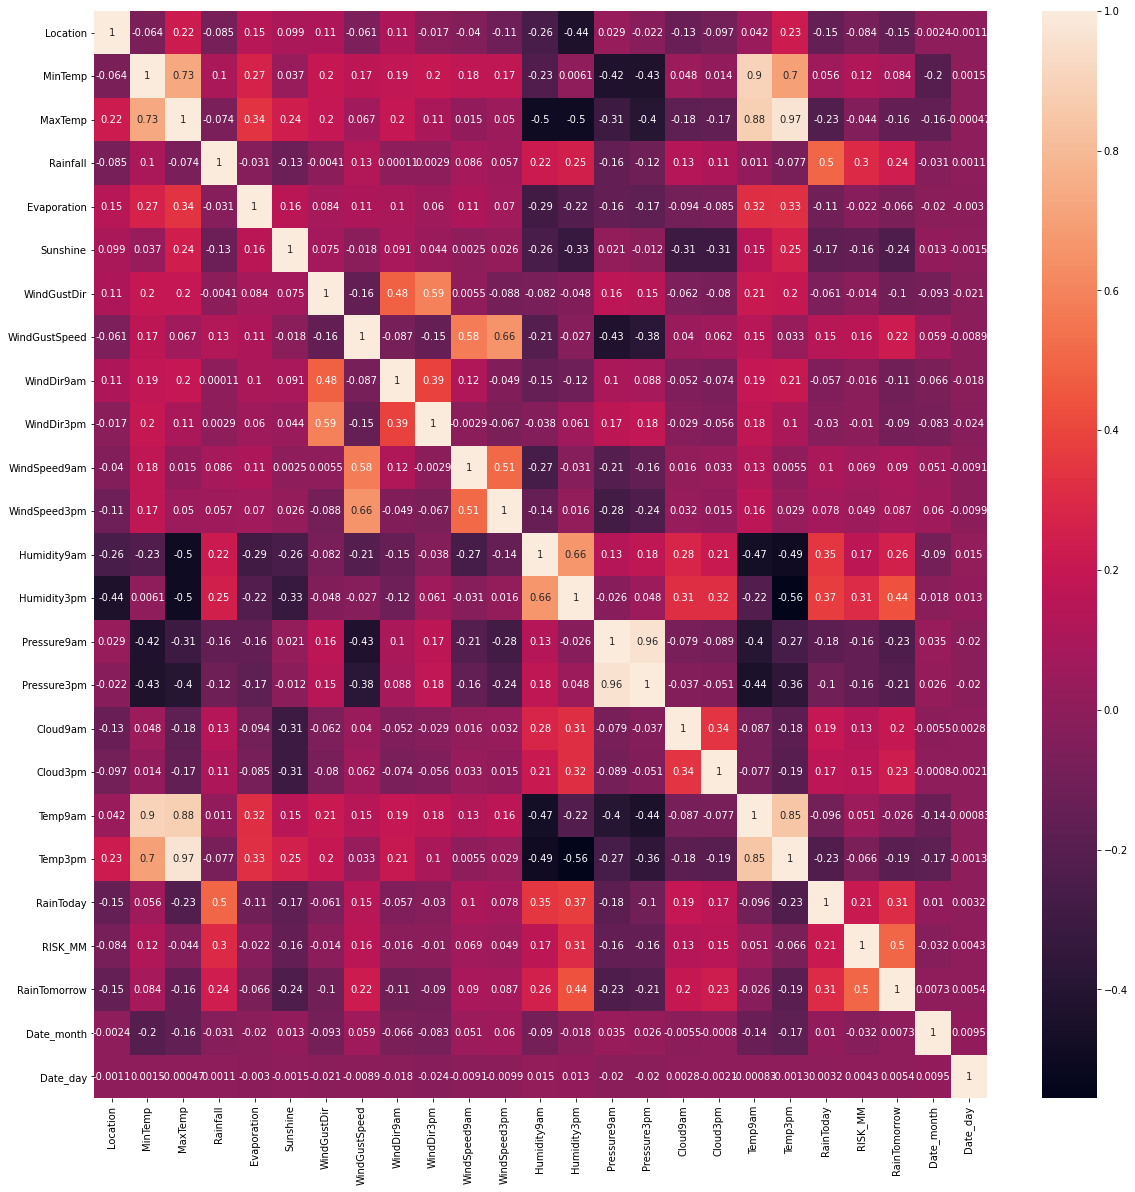

In [36]:
corrmat = df.corr()
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(corrmat,annot=True)


C:\Users\Dell\anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='RainTomorrow', ylabel='count'>

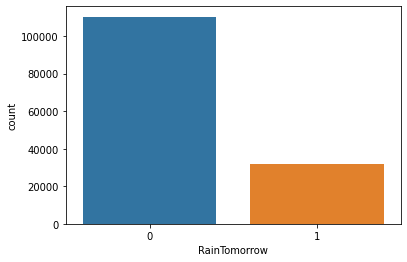

In [37]:
sns.countplot(df["RainTomorrow"])

C:\Users\Dell\anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\Users\Dell\anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\Users\Dell\anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\Users\Dell\anaconda3\lib\site-pack

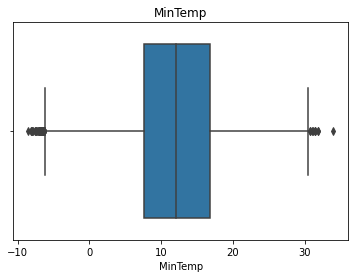

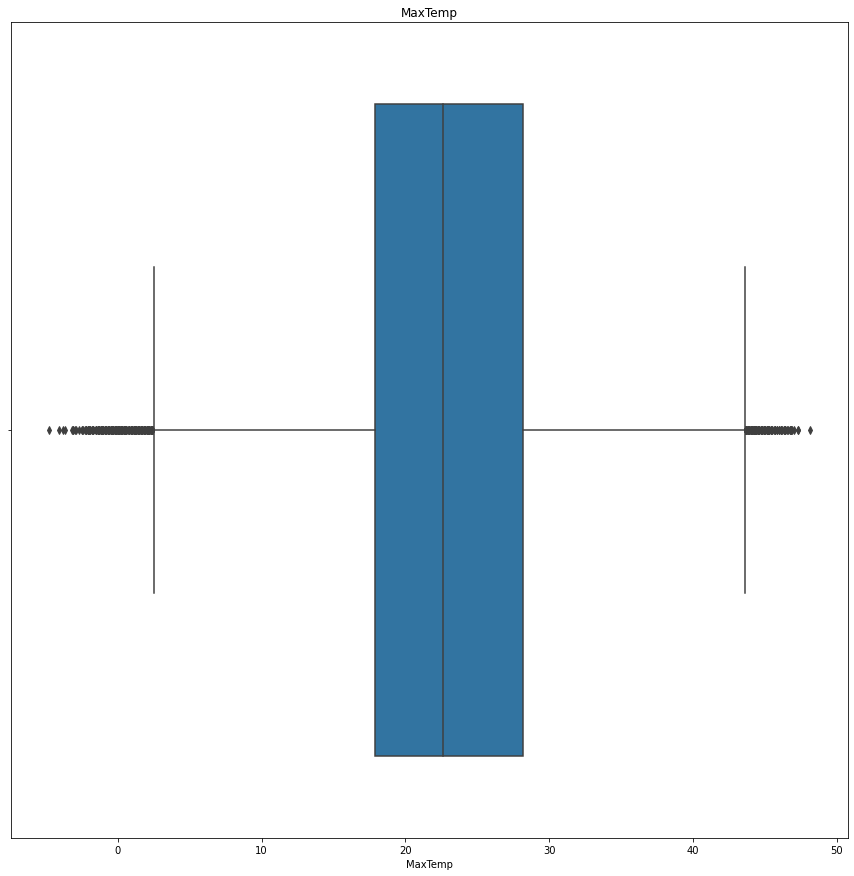

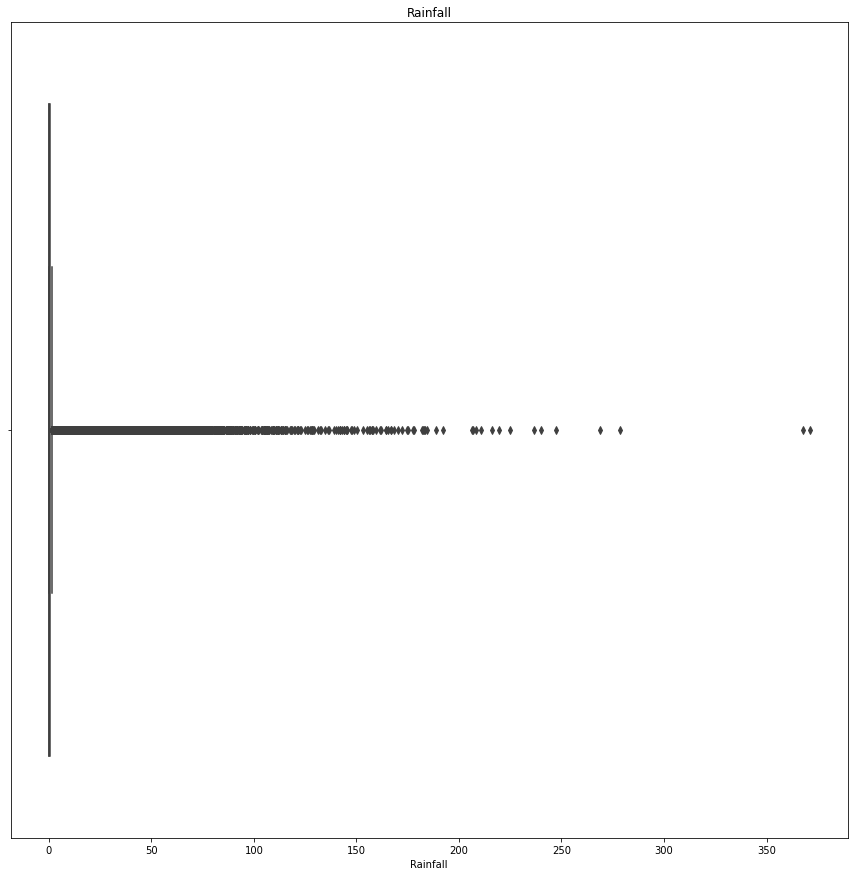

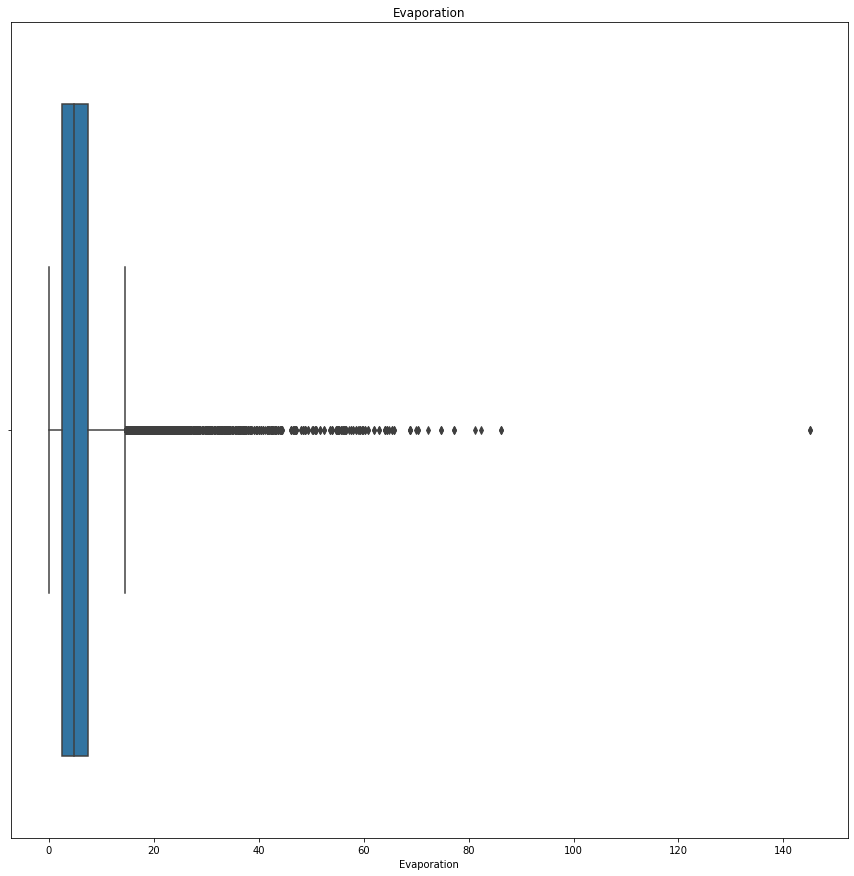

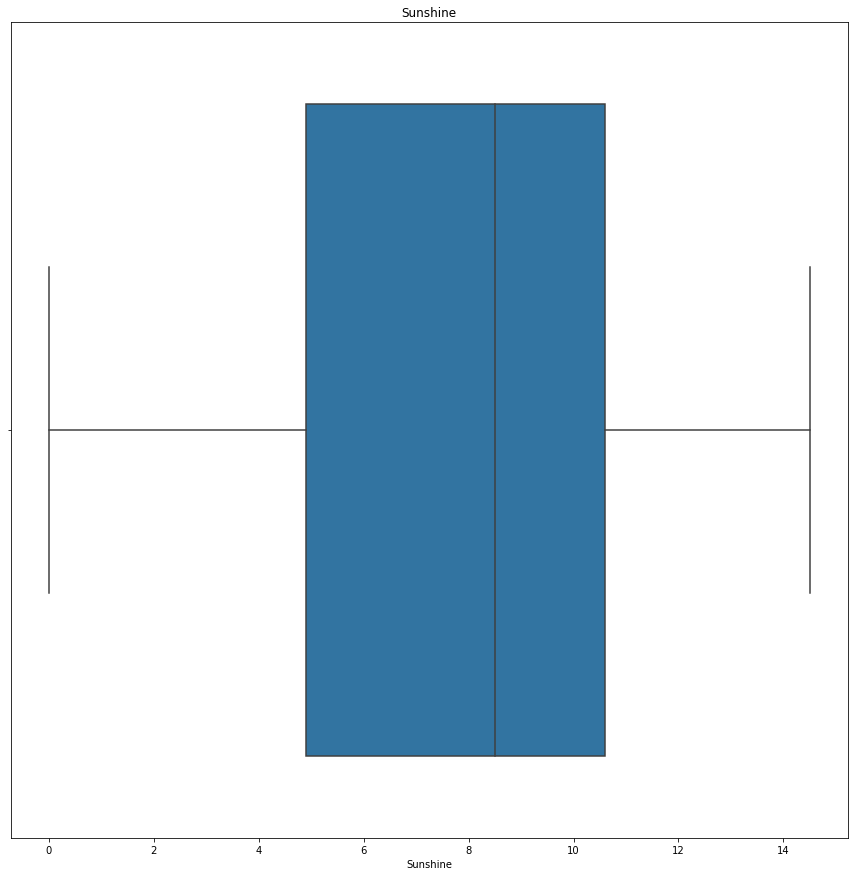

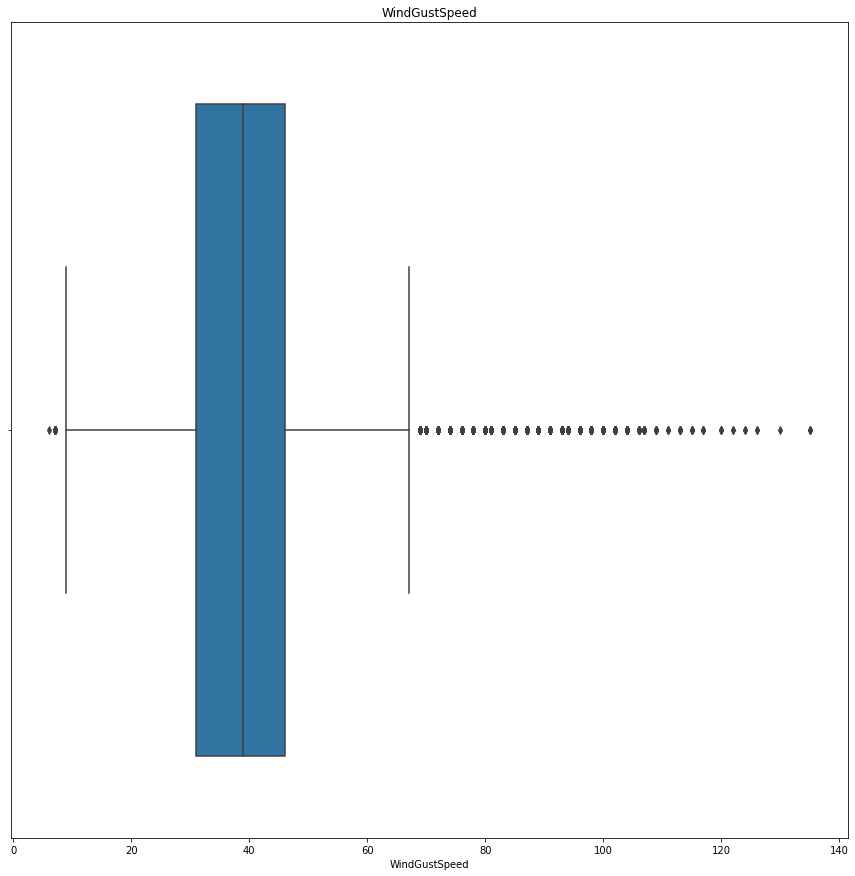

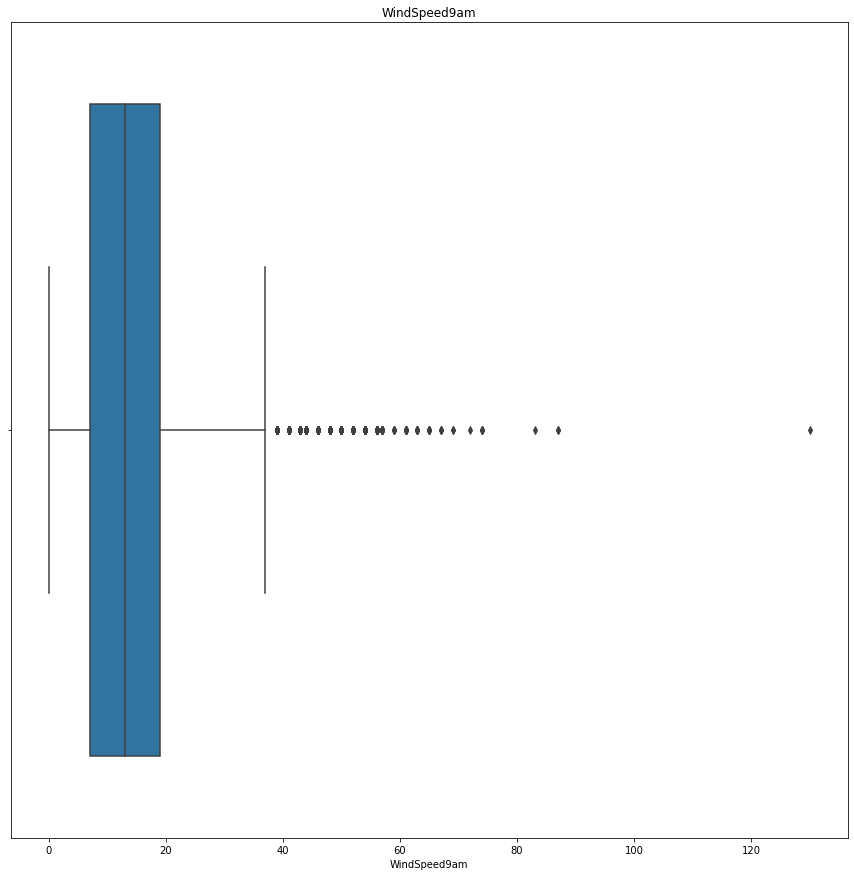

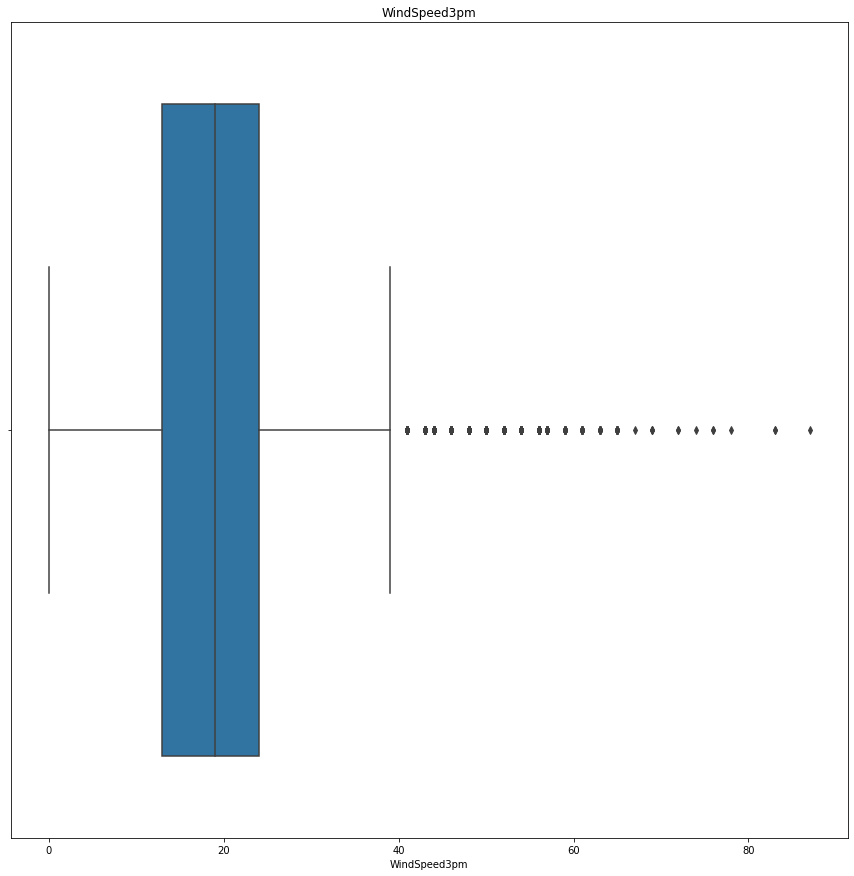

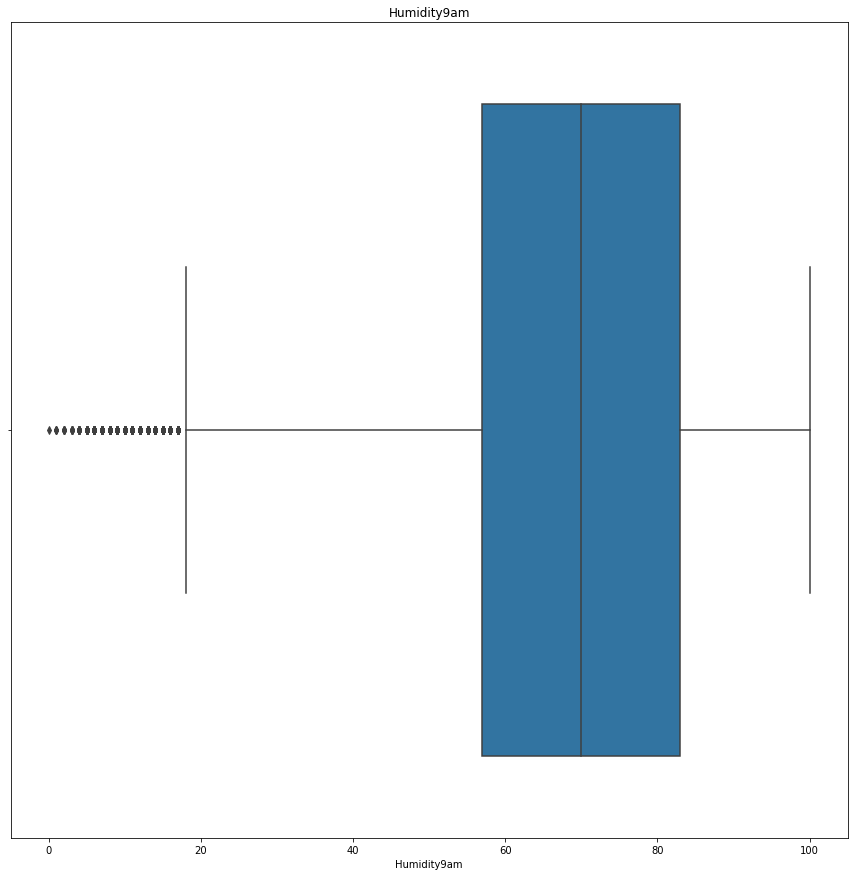

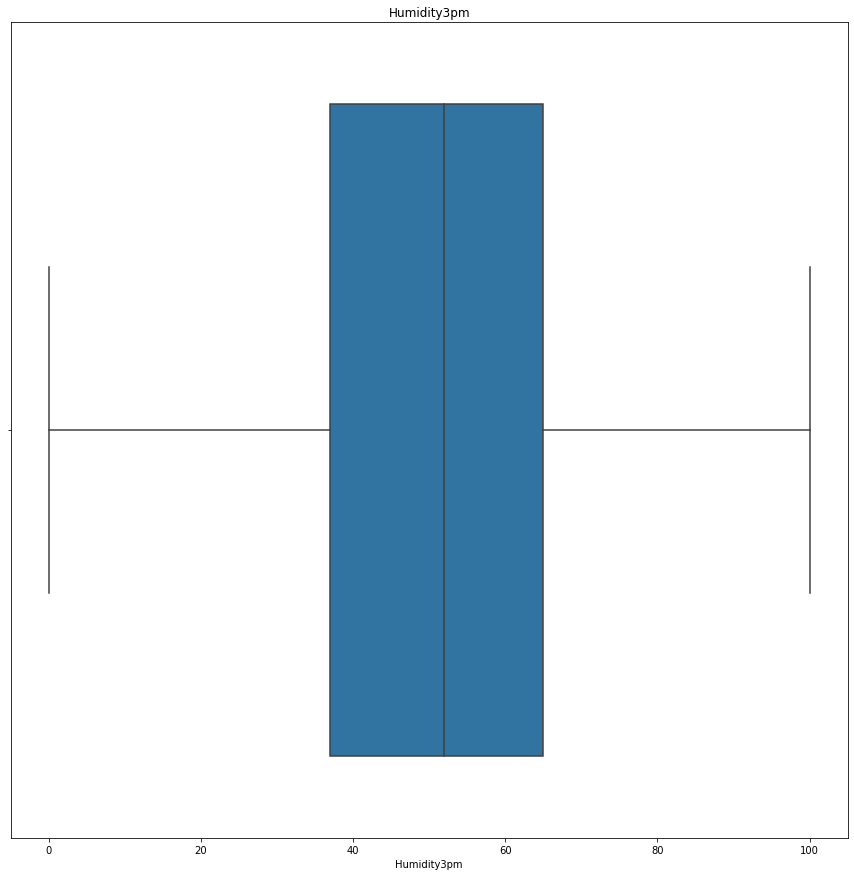

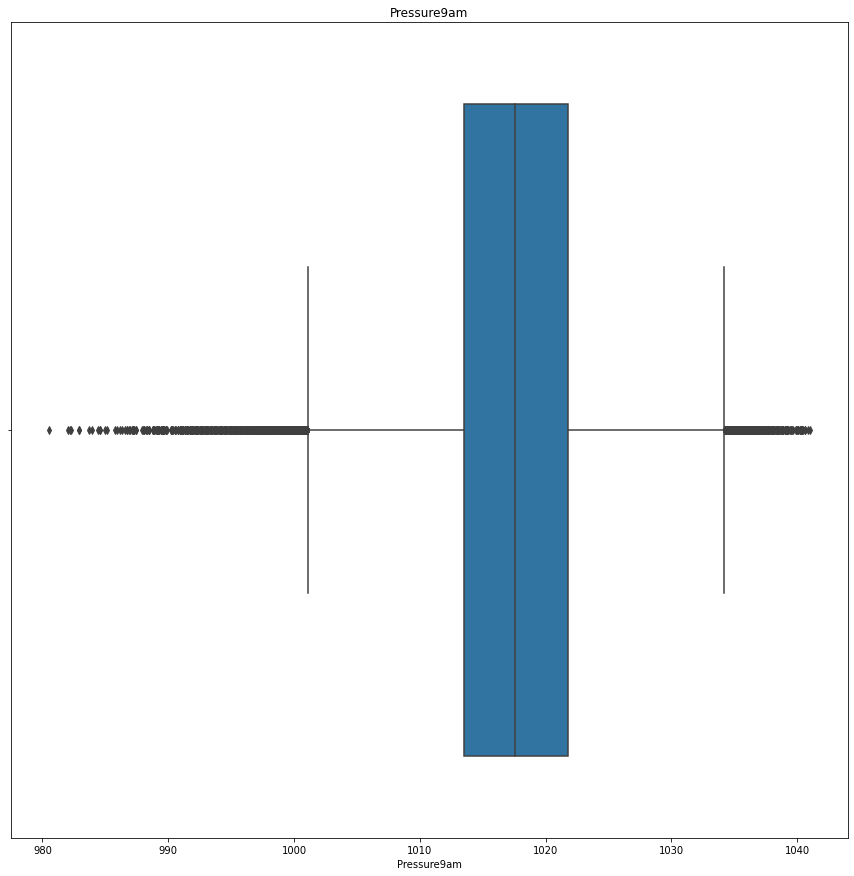

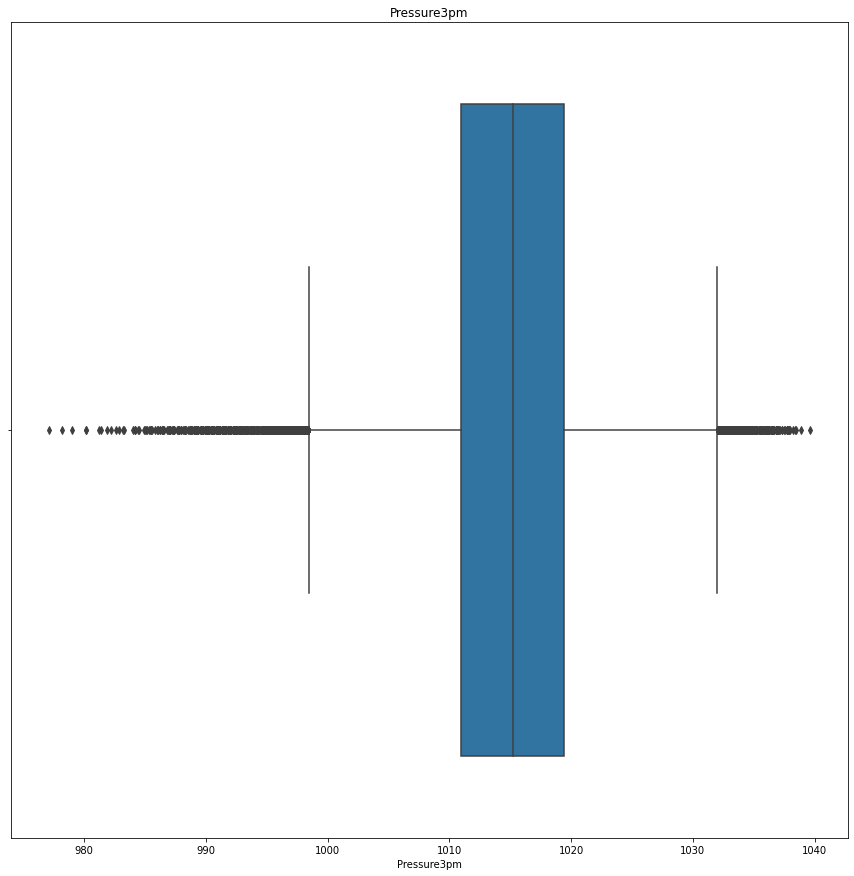

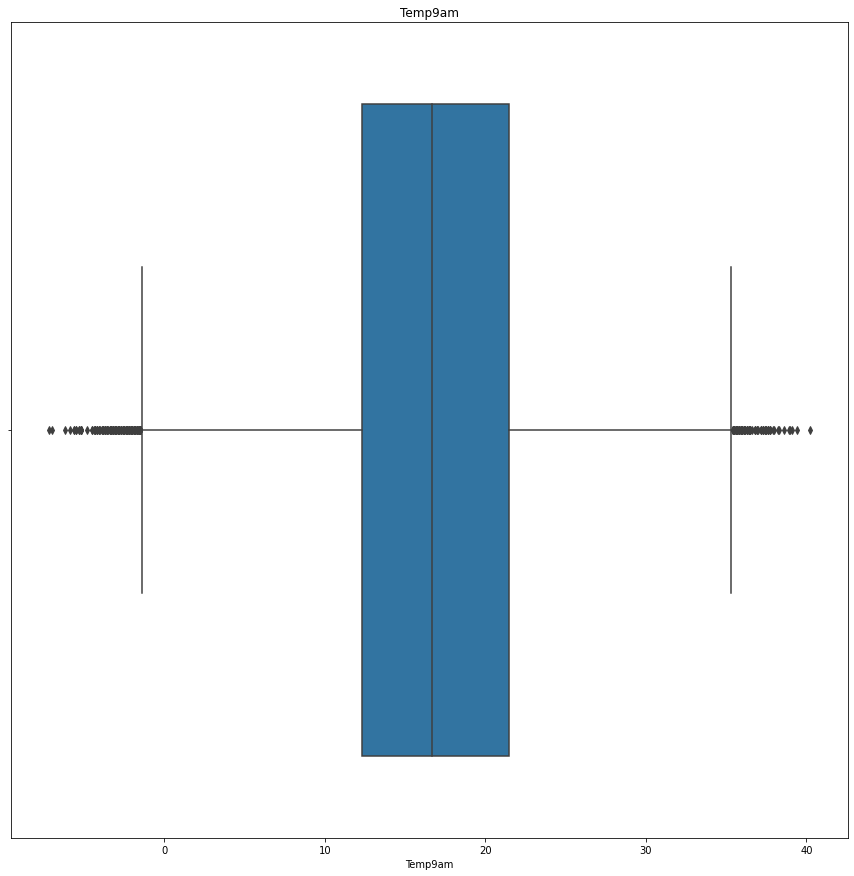

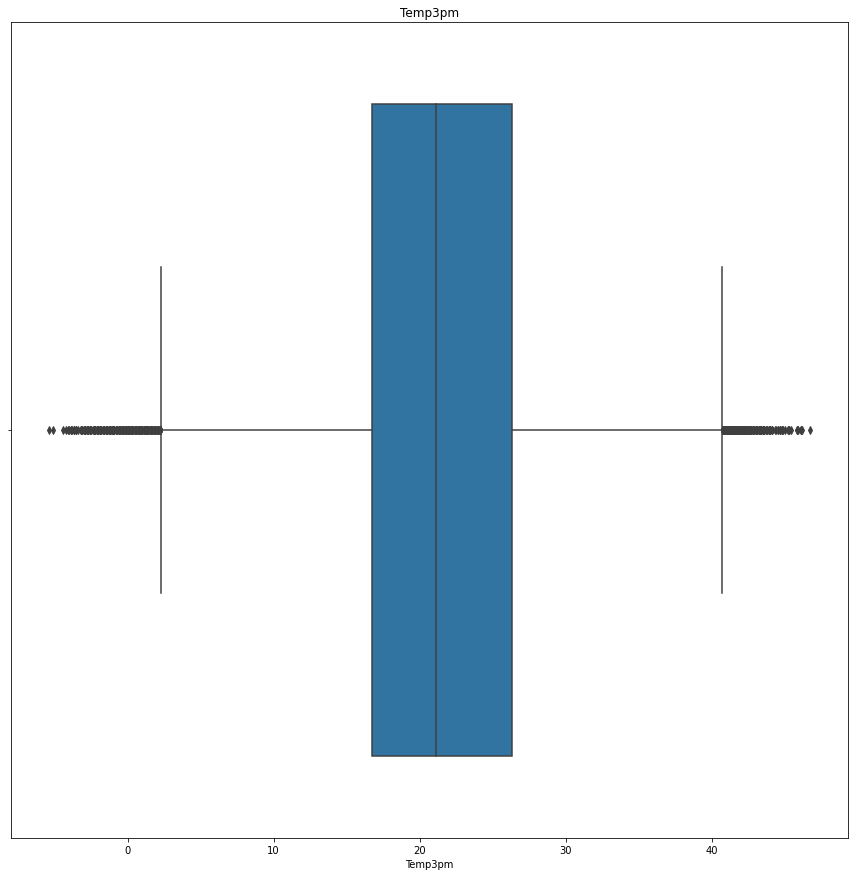

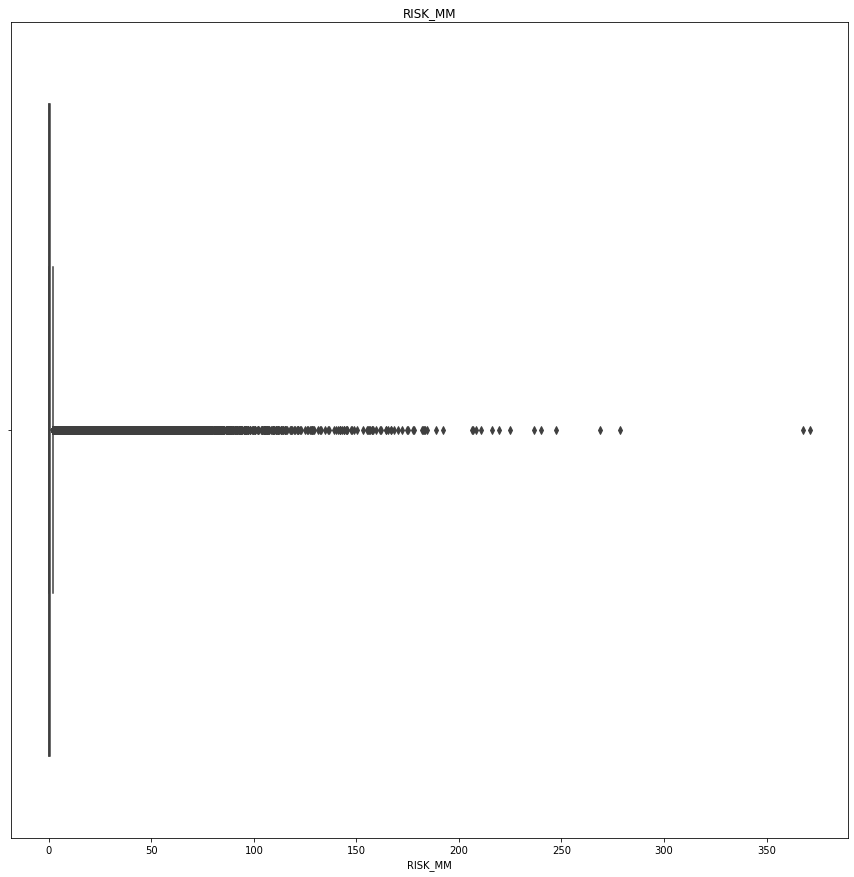

<Figure size 1080x1080 with 0 Axes>

In [38]:
for feature in continuous_feature:
    data=df.copy()
    sns.boxplot(data[feature])
    plt.title(feature)
    plt.figure(figsize=(15,15))

In [39]:
for feature in continuous_feature:
    print(feature)

MinTemp
MaxTemp
Rainfall
Evaporation
Sunshine
WindGustSpeed
WindSpeed9am
WindSpeed3pm
Humidity9am
Humidity3pm
Pressure9am
Pressure3pm
Temp9am
Temp3pm
RISK_MM


In [40]:
IQR=df.MinTemp.quantile(0.75)-df.MinTemp.quantile(0.25)
lower_bridge=df.MinTemp.quantile(0.25)-(IQR*1.5)
upper_bridge=df.MinTemp.quantile(0.75)+(IQR*1.5)
print(lower_bridge, upper_bridge)

-6.200000000000001 30.6


In [41]:
df.loc[df['MinTemp']>=30.6,'MinTemp']=30.6
df.loc[df['MinTemp']<=-6.20,'MinTemp']=-6.20

In [42]:
IQR=df.MaxTemp.quantile(0.75)-df.MaxTemp.quantile(0.25)
lower_bridge=df.MaxTemp.quantile(0.25)-(IQR*1.5)
upper_bridge=df.MaxTemp.quantile(0.75)+(IQR*1.5)
print(lower_bridge, upper_bridge)

2.4499999999999975 43.65


In [43]:
df.loc[df['MaxTemp']>=43.65,'MaxTemp']=43.65
df.loc[df['MaxTemp']<=2.449,'MaxTemp']=2.449

In [44]:
IQR=df.Rainfall.quantile(0.75)-df.Rainfall.quantile(0.25)
lower_bridge=df.Rainfall.quantile(0.25)-(IQR*1.5)
upper_bridge=df.Rainfall.quantile(0.75)+(IQR*1.5)
print(lower_bridge, upper_bridge)

-0.8999999999999999 1.5


In [45]:
df.loc[df['Rainfall']>=1.5,'Rainfall']=1.5
df.loc[df['Rainfall']<=-0.89,'Rainfall']=-0.89

In [46]:
IQR=df.Evaporation.quantile(0.75)-df.Evaporation.quantile(0.25)
lower_bridge=df.Evaporation.quantile(0.25)-(IQR*1.5)
upper_bridge=df.Evaporation.quantile(0.75)+(IQR*1.5)
print(lower_bridge, upper_bridge)

-4.600000000000001 14.600000000000001


In [47]:
df.loc[df['Evaporation']>=14.6,'Evaporation']=14.6
df.loc[df['Evaporation']<=-4.6,'Evaporation']=-4.6

In [48]:
IQR=df.WindGustSpeed.quantile(0.75)-df.WindGustSpeed.quantile(0.25)
lower_bridge=df.WindGustSpeed.quantile(0.25)-(IQR*1.5)
upper_bridge=df.WindGustSpeed.quantile(0.75)+(IQR*1.5)
print(lower_bridge, upper_bridge)

8.5 68.5


In [49]:
df.loc[df['WindGustSpeed']>=68.5,'WindGustSpeed']=68.5
df.loc[df['WindGustSpeed']<=8.5,'WindGustSpeed']=8.5

In [50]:
IQR=df.WindSpeed9am.quantile(0.75)-df.WindSpeed9am.quantile(0.25)
lower_bridge=df.WindSpeed9am.quantile(0.25)-(IQR*1.5)
upper_bridge=df.WindSpeed9am.quantile(0.75)+(IQR*1.5)
print(lower_bridge, upper_bridge)

-11.0 37.0


In [51]:
df.loc[df['WindSpeed9am']>=37,'WindSpeed9am']=37
df.loc[df['WindSpeed9am']<=-11,'WindSpeed9am']=-11

In [52]:
IQR=df.WindSpeed3pm.quantile(0.75)-df.WindSpeed3pm.quantile(0.25)
lower_bridge=df.WindSpeed3pm.quantile(0.25)-(IQR*1.5)
upper_bridge=df.WindSpeed3pm.quantile(0.75)+(IQR*1.5)
print(lower_bridge, upper_bridge)

-3.5 40.5


In [53]:
df.loc[df['WindSpeed3pm']>40.5,'WindSpeed3pm']=40.5
df.loc[df['WindSpeed3pm']<=-3.5,'WindSpeed3pm']=-3.5

In [54]:
IQR=df.Humidity9am.quantile(0.75)-df.Humidity9am.quantile(0.25)
lower_bridge=df.Humidity9am.quantile(0.25)-(IQR*1.5)
upper_bridge=df.Humidity9am.quantile(0.75)+(IQR*1.5)
print(lower_bridge, upper_bridge)

18.0 122.0


In [55]:
df.loc[df['Humidity9am']>=122,'Humidity9am']=122
df.loc[df['Humidity9am']<=18,'Humidity9am']=18

In [56]:
IQR=df.Pressure9am.quantile(0.75)-df.Pressure9am.quantile(0.25)
lower_bridge=df.Pressure9am.quantile(0.25)-(IQR*1.5)
upper_bridge=df.Pressure9am.quantile(0.75)+(IQR*1.5)
print(lower_bridge, upper_bridge)

1001.0500000000001 1034.25


In [57]:
df.loc[df['Pressure9am']>=1034.25,'Pressure9am']=1034.25
df.loc[df['Pressure9am']<=1001.05,'Pressure9am']=1001.05

In [58]:
IQR=df.Pressure3pm.quantile(0.75)-df.Pressure3pm.quantile(0.25)
lower_bridge=df.Pressure3pm.quantile(0.25)-(IQR*1.5)
upper_bridge=df.Pressure3pm.quantile(0.75)+(IQR*1.5)
print(lower_bridge, upper_bridge)

998.4000000000001 1032.0


In [59]:
df.loc[df['Pressure3pm']>=1031.85,'Pressure3pm']=1031.85
df.loc[df['Pressure3pm']<=998.65,'Pressure3pm']=998.65

In [60]:
IQR=df.Temp9am.quantile(0.75)-df.Temp9am.quantile(0.25)
lower_bridge=df.Temp9am.quantile(0.25)-(IQR*1.5)
upper_bridge=df.Temp9am.quantile(0.75)+(IQR*1.5)
print(lower_bridge, upper_bridge)

-1.4999999999999982 35.3


In [61]:
df.loc[df['Temp9am']>=35.3,'Temp9am']=35.3
df.loc[df['Temp9am']<=-1.49,'Temp9am']=-1.49

In [62]:
IQR=df.Temp3pm.quantile(0.75)-df.Temp3pm.quantile(0.25)
lower_bridge=df.Temp3pm.quantile(0.25)-(IQR*1.5)
upper_bridge=df.Temp3pm.quantile(0.75)+(IQR*1.5)
print(lower_bridge, upper_bridge)

2.299999999999997 40.7


In [63]:
df.loc[df['Temp3pm']>=40.7,'Temp3pm']=40.7
df.loc[df['Temp3pm']<=2.29,'Temp3pm']=2.29

C:\Users\Dell\anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\Users\Dell\anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\Users\Dell\anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\Users\Dell\anaconda3\lib\site-pack

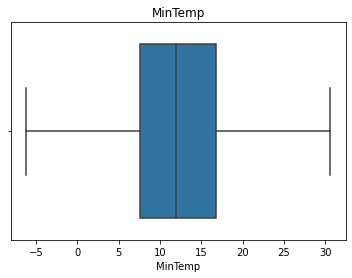

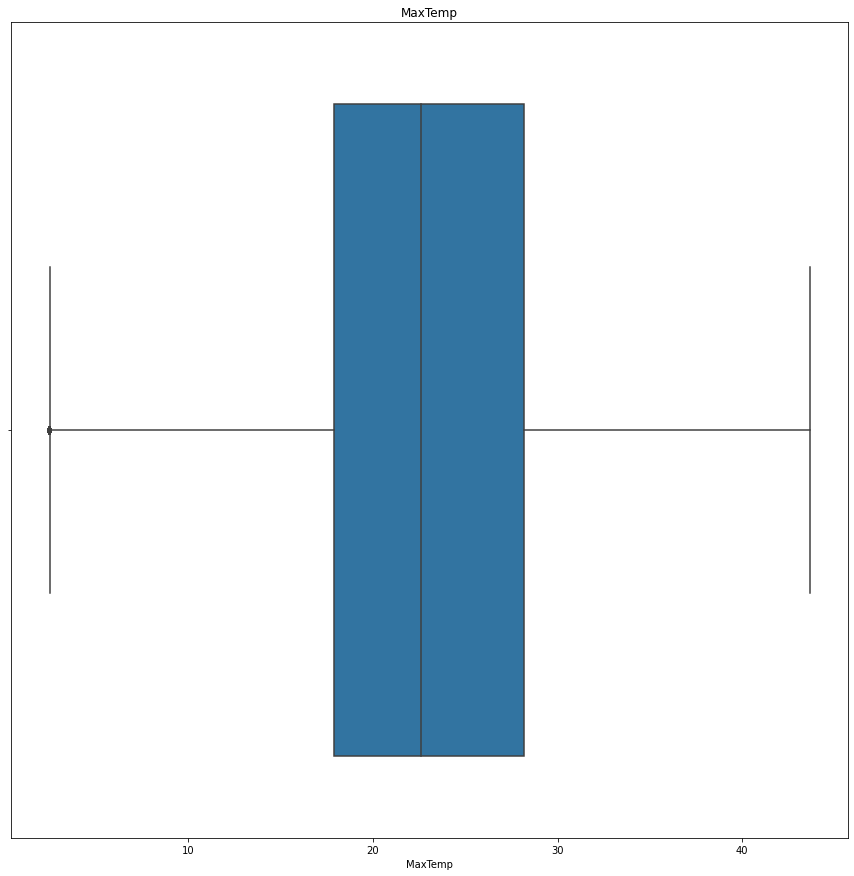

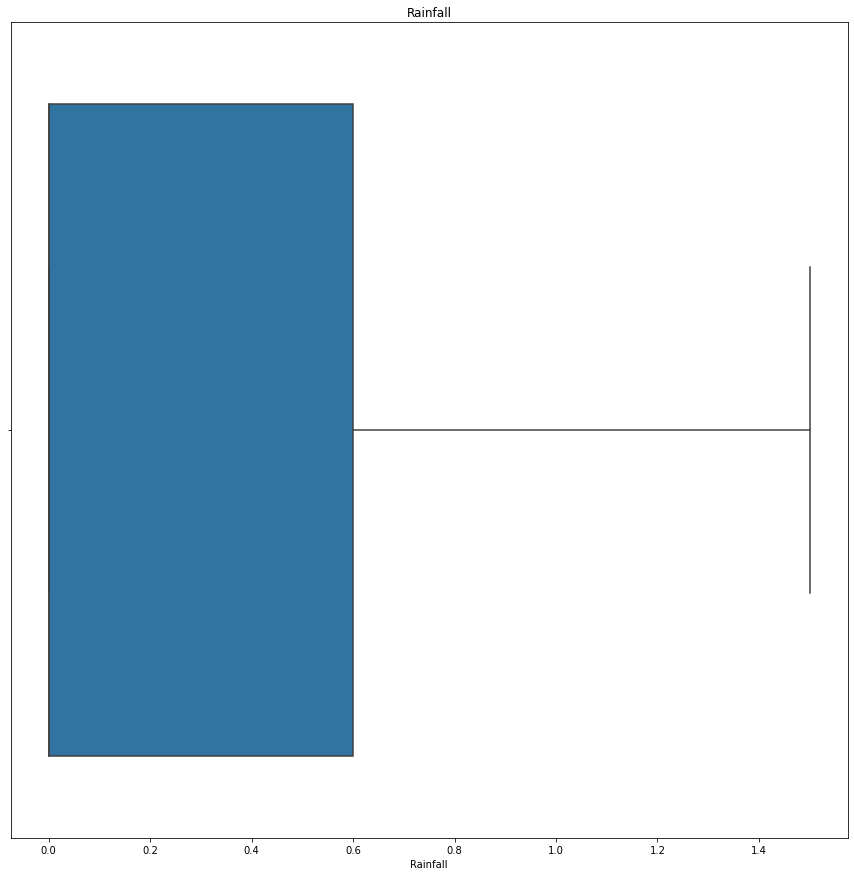

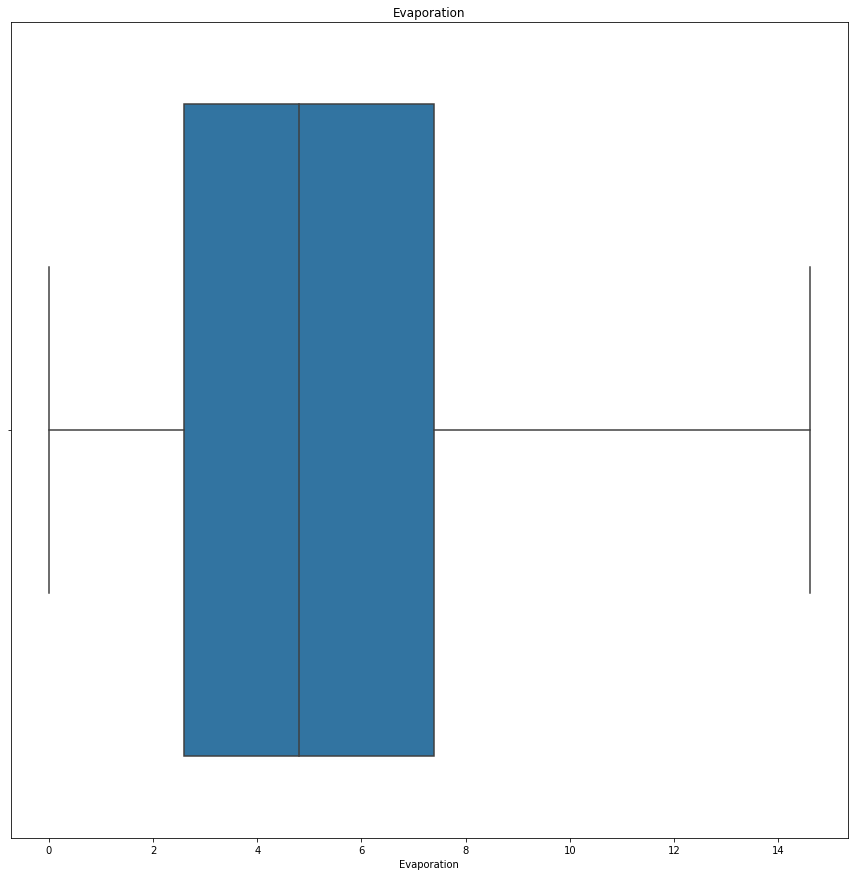

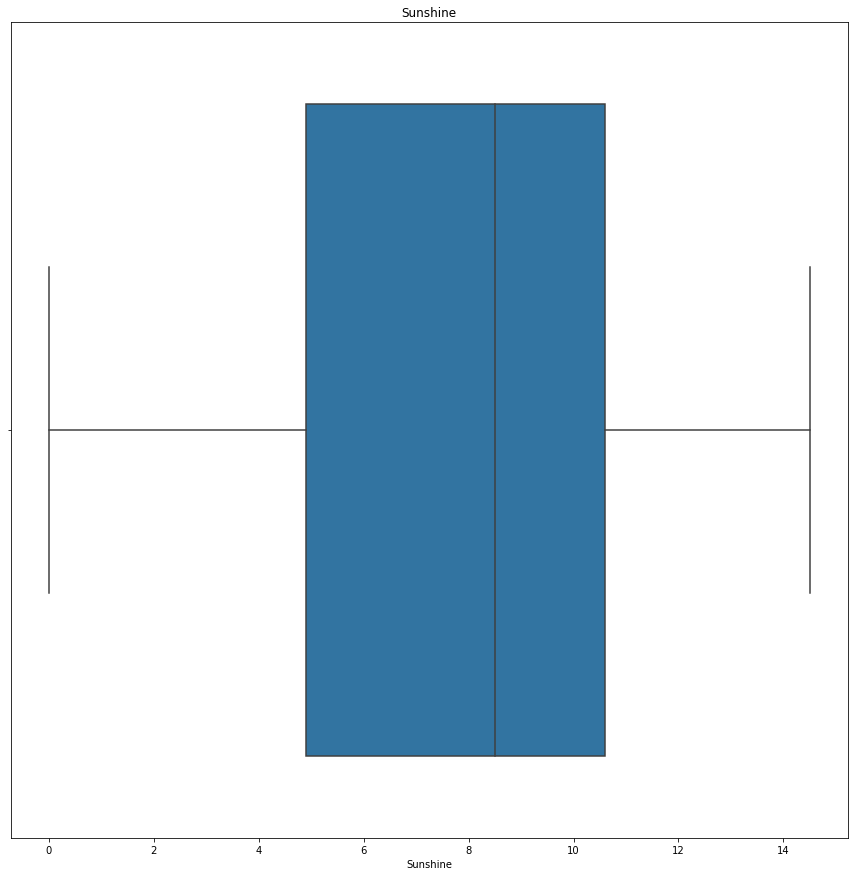

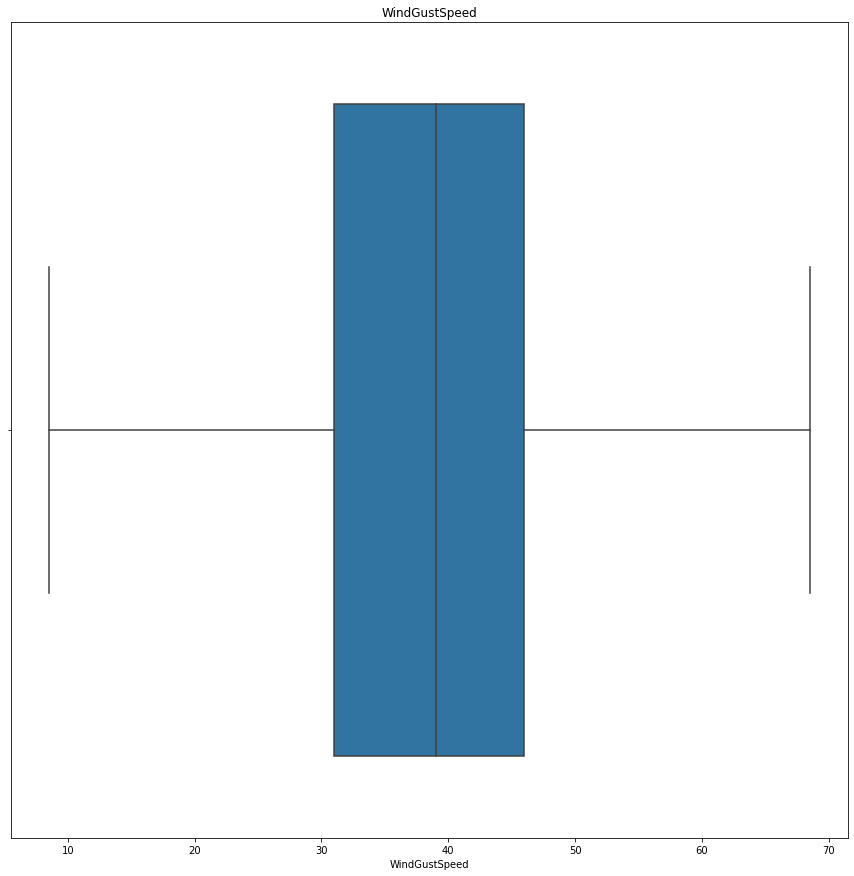

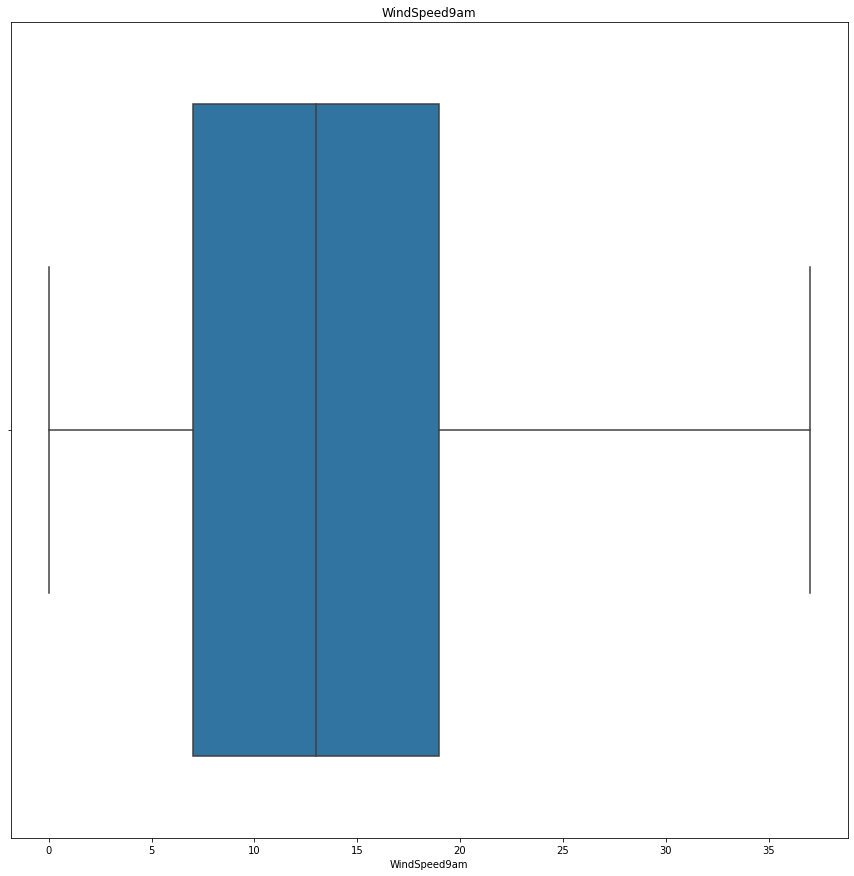

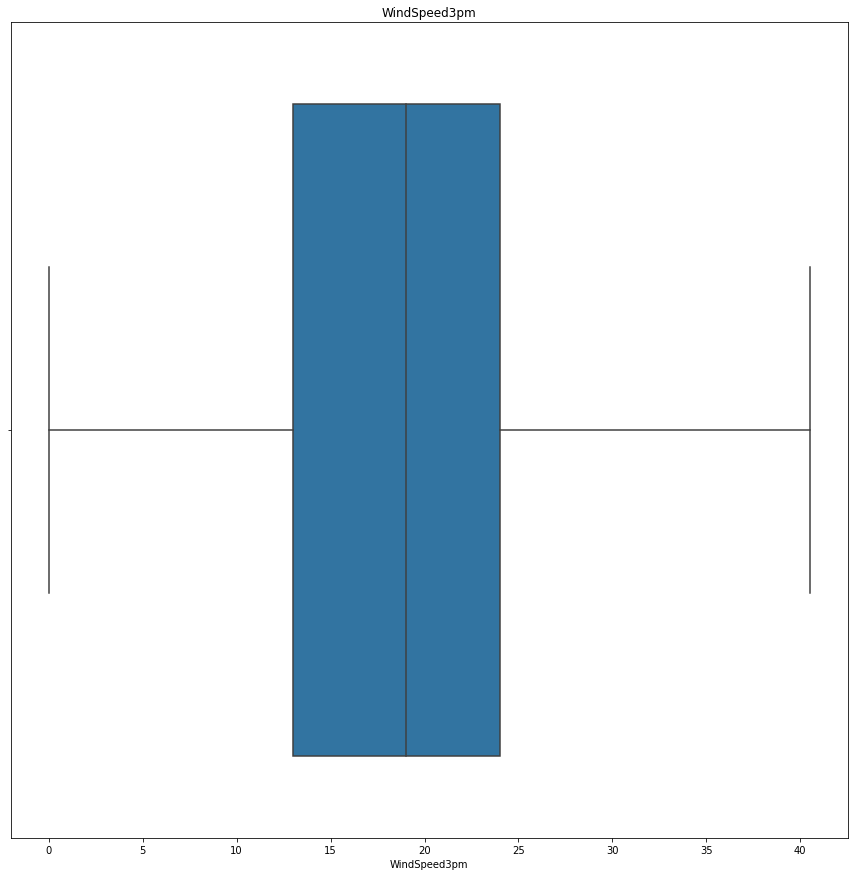

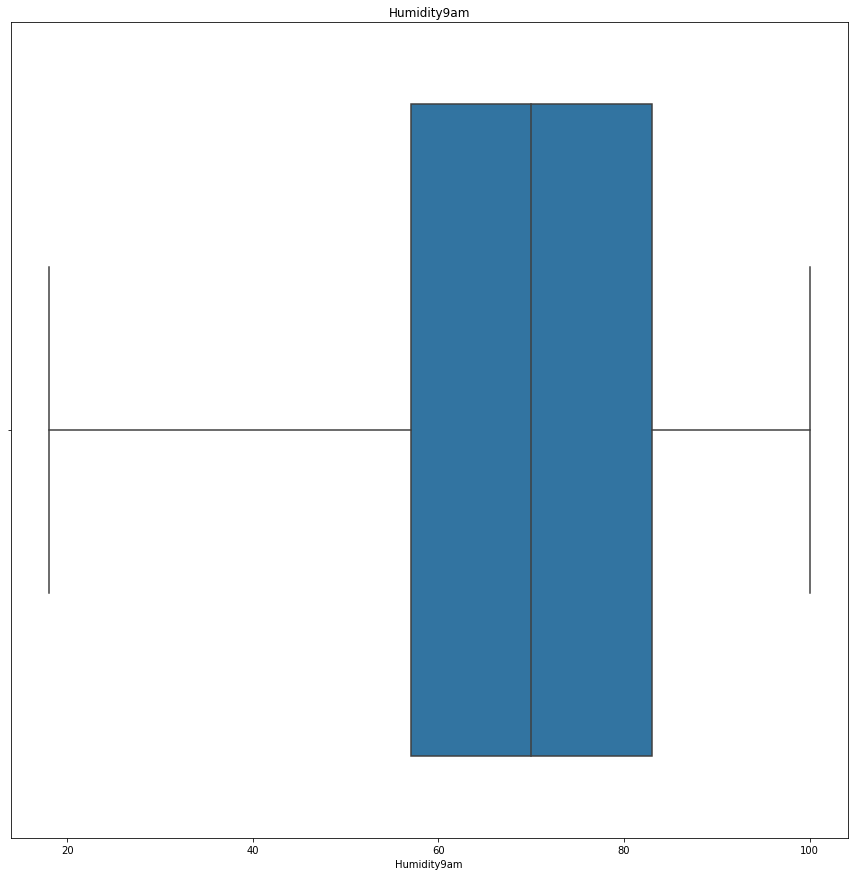

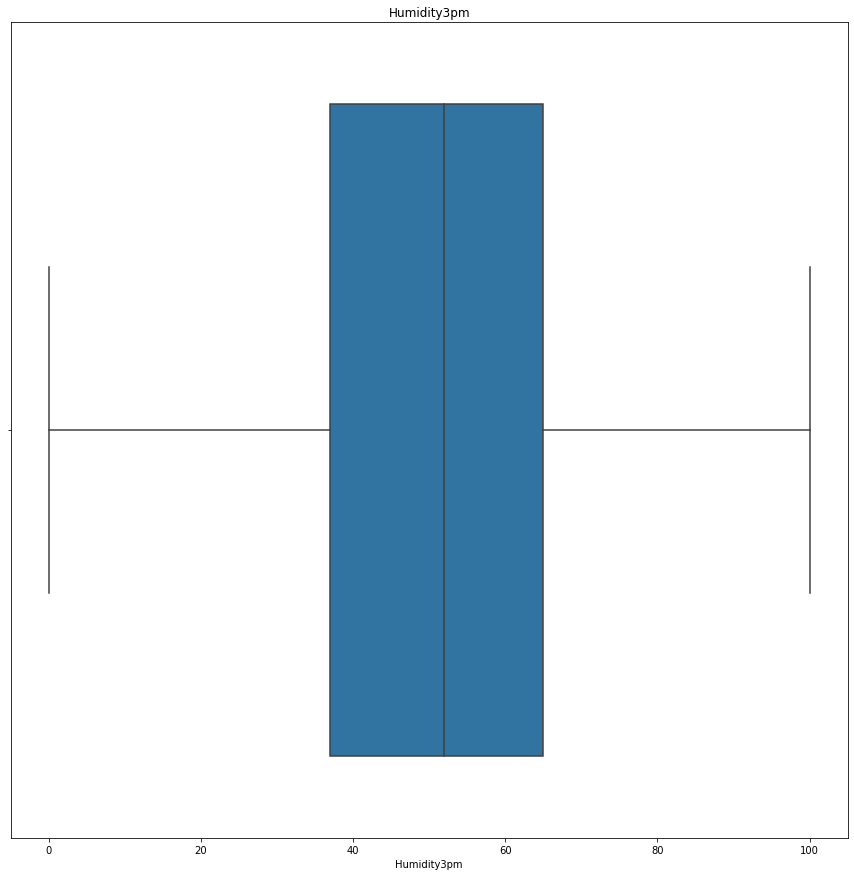

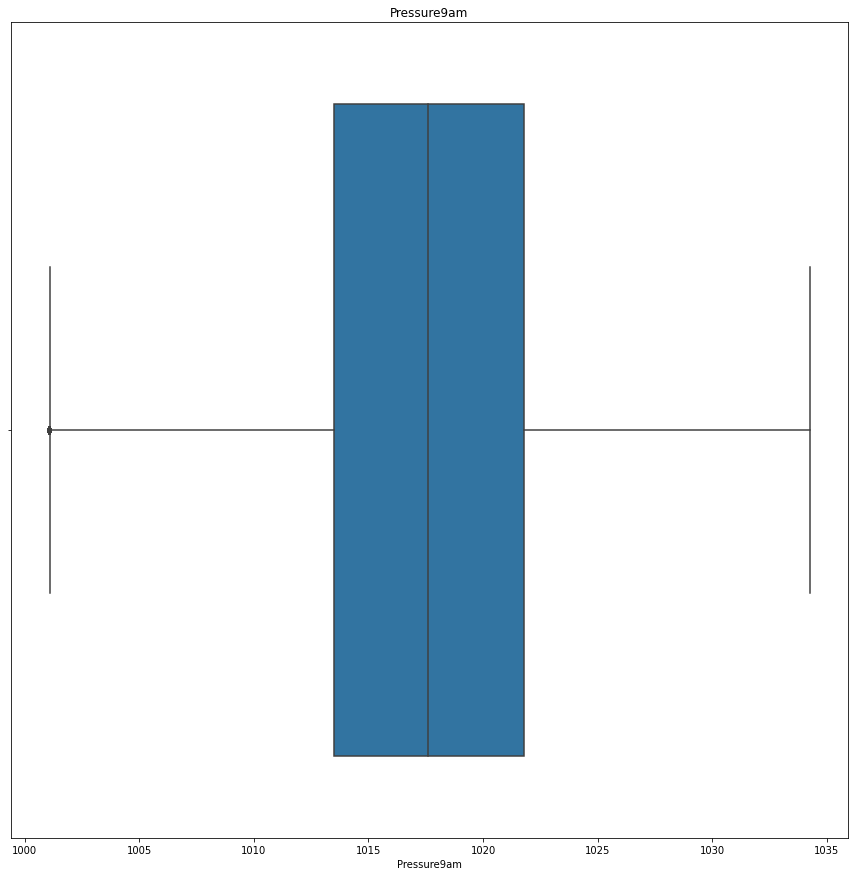

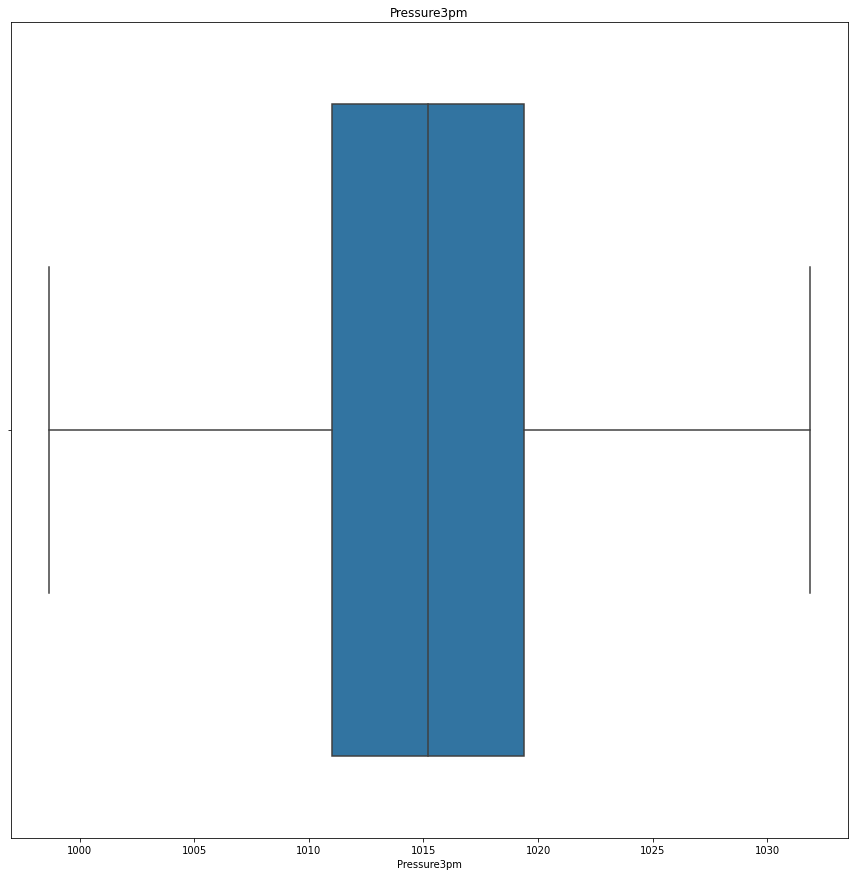

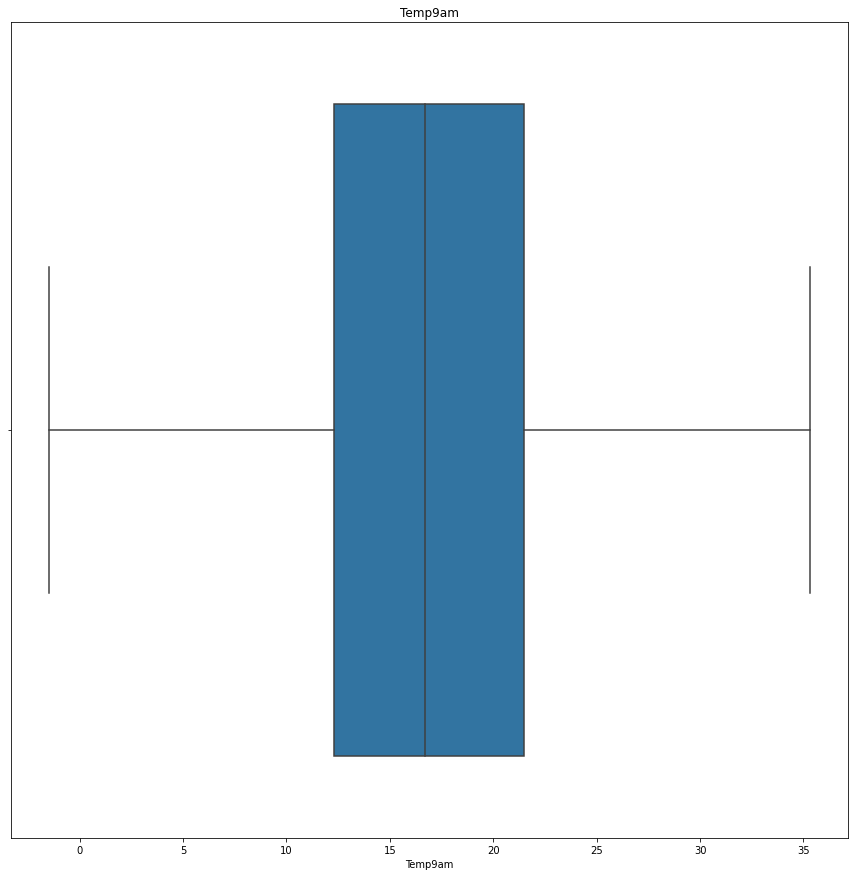

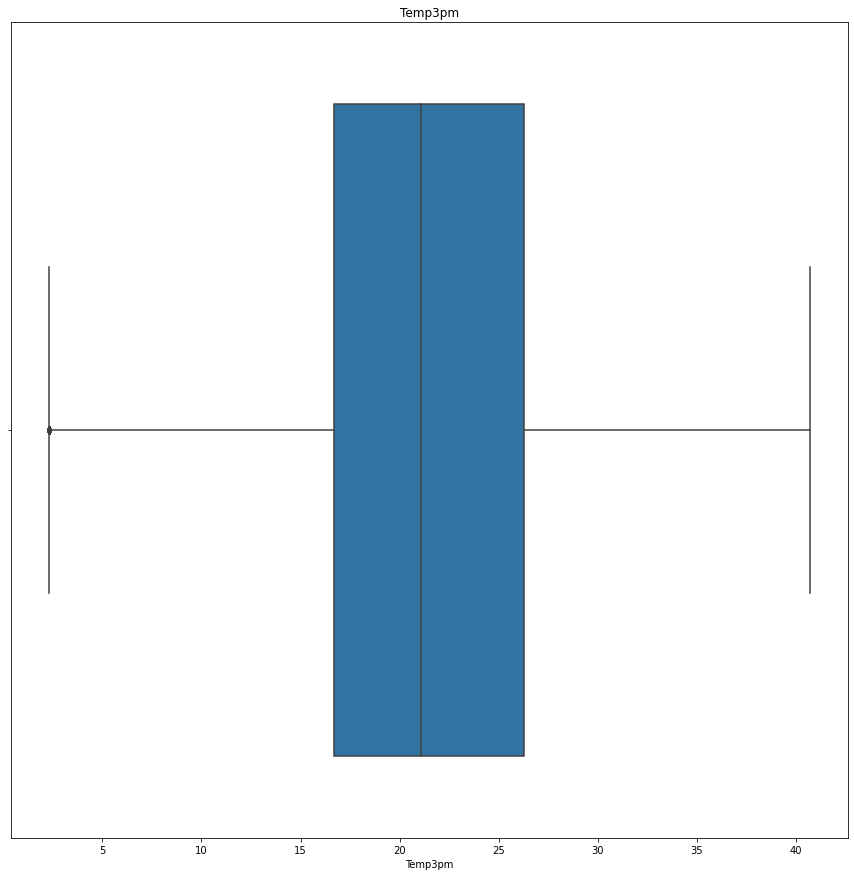

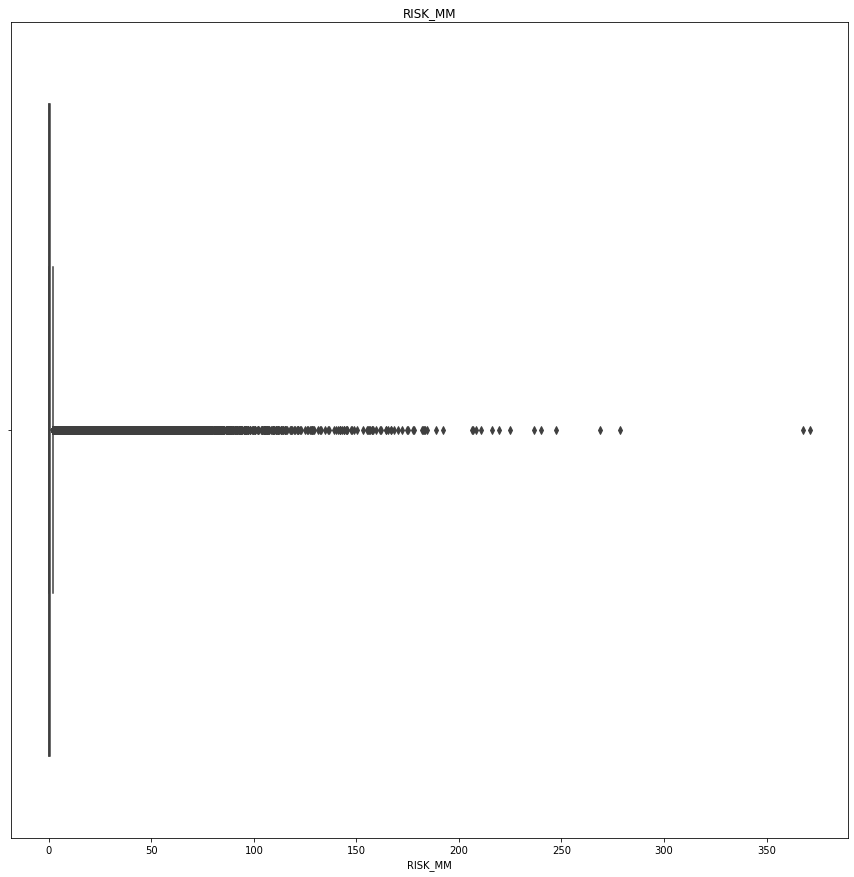

<Figure size 1080x1080 with 0 Axes>

In [64]:
for feature in continuous_feature:
    data=df.copy()
    sns.boxplot(data[feature])
    plt.title(feature)
    plt.figure(figsize=(15,15))

In [65]:
def qq_plots(df, variable):
    plt.figure(figsize=(15,6))
    plt.subplot(1, 2, 1)
    df[variable].hist()
    plt.subplot(1, 2, 2)
    stats.probplot(df[variable], dist="norm", plot=plt)
    plt.show()

MinTemp


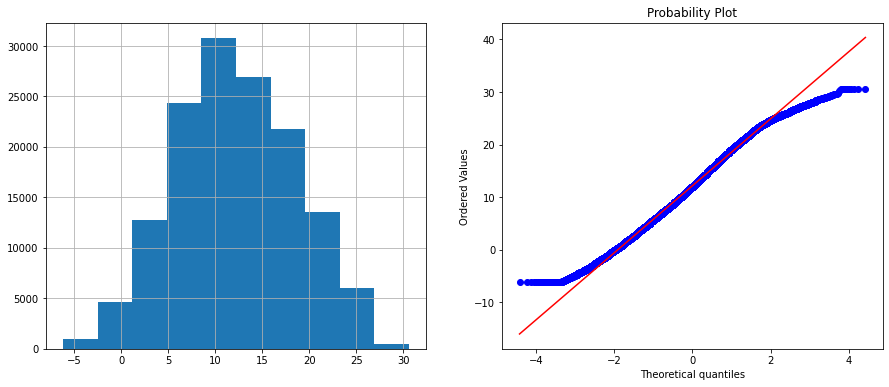

MaxTemp


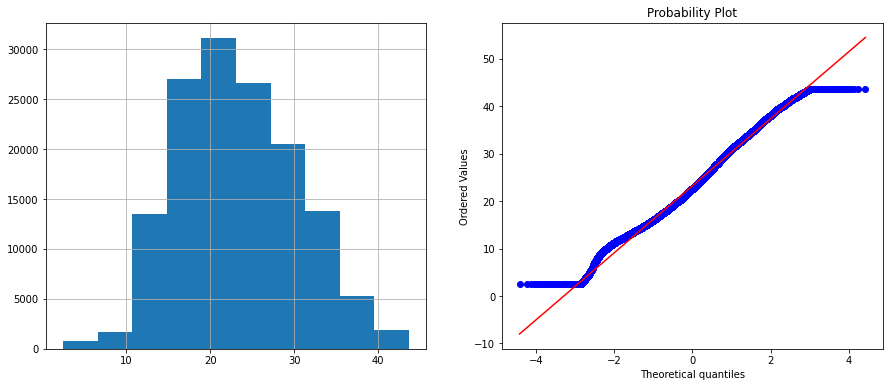

Rainfall


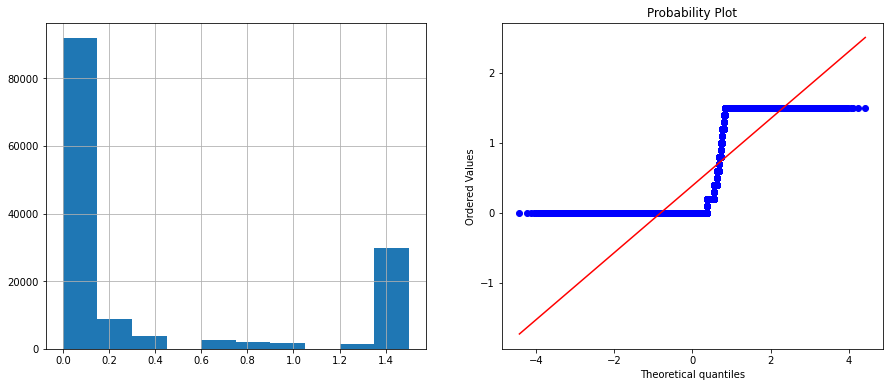

Evaporation


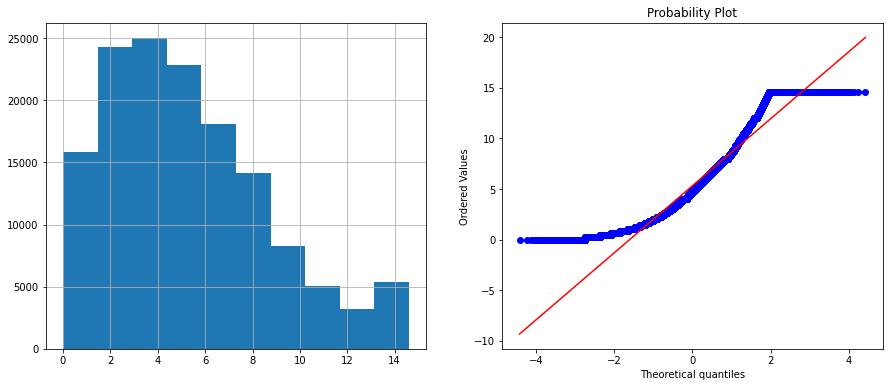

Sunshine


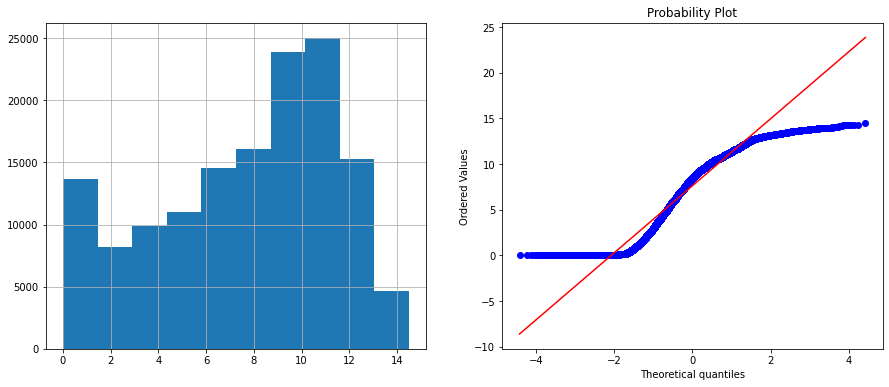

WindGustSpeed


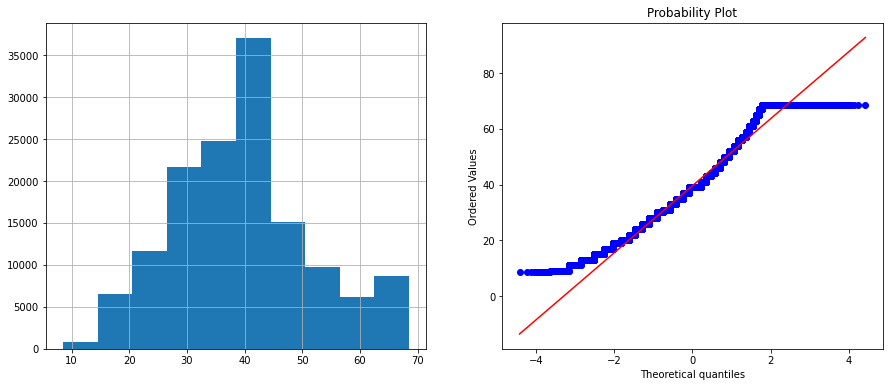

WindSpeed9am


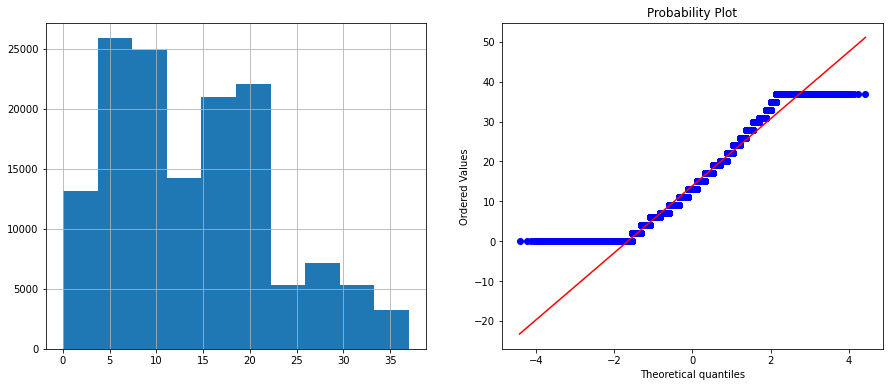

WindSpeed3pm


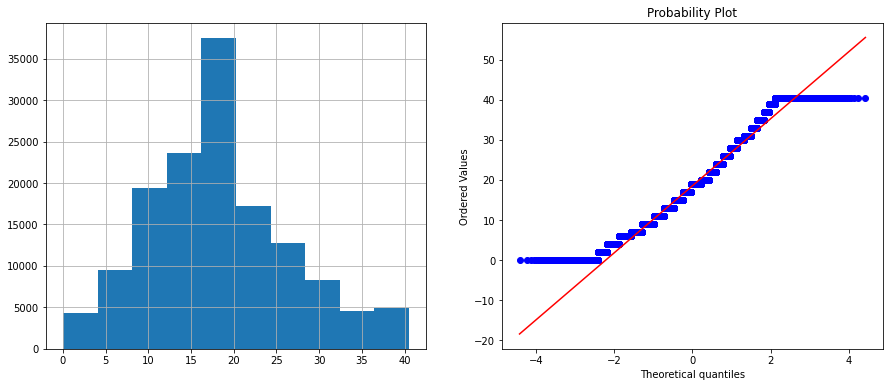

Humidity9am


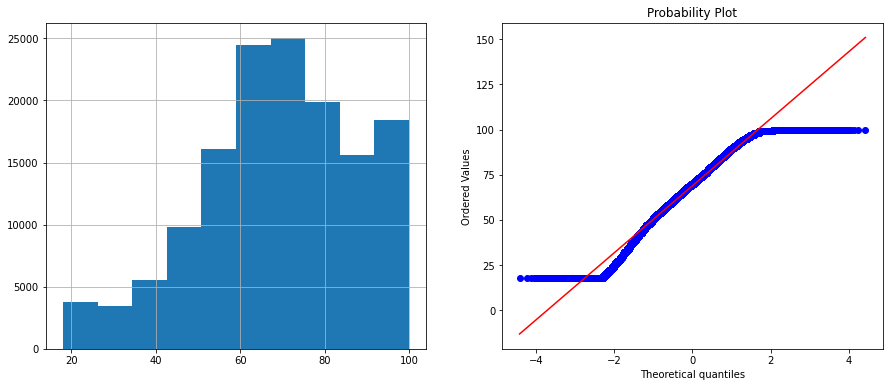

Humidity3pm


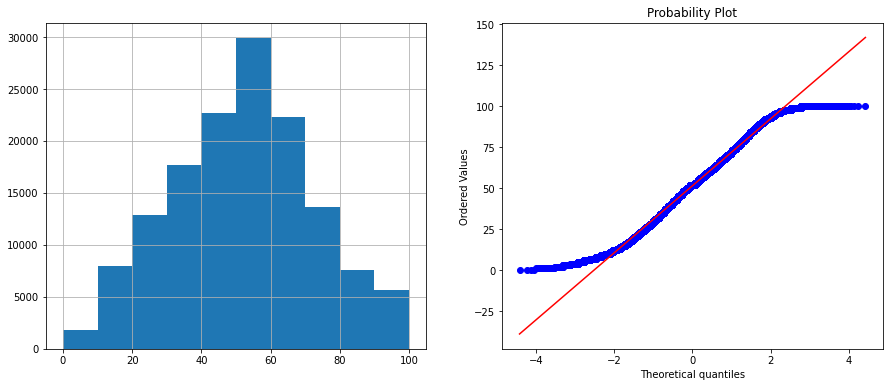

Pressure9am


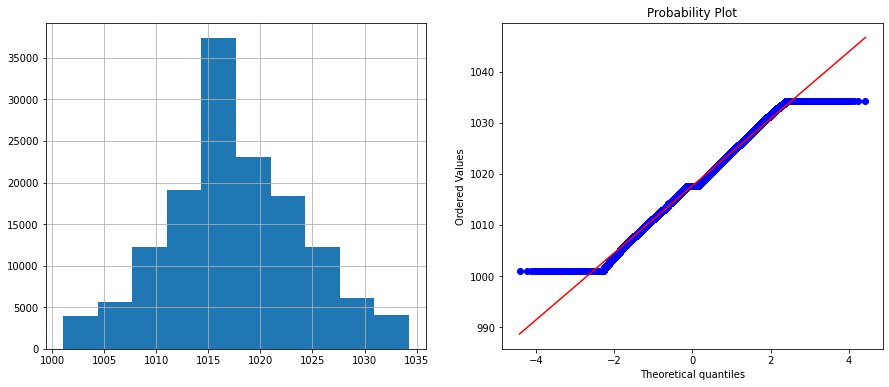

Pressure3pm


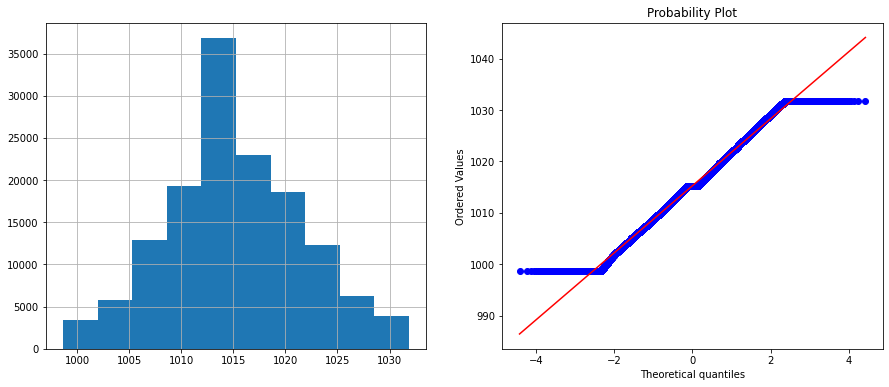

Temp9am


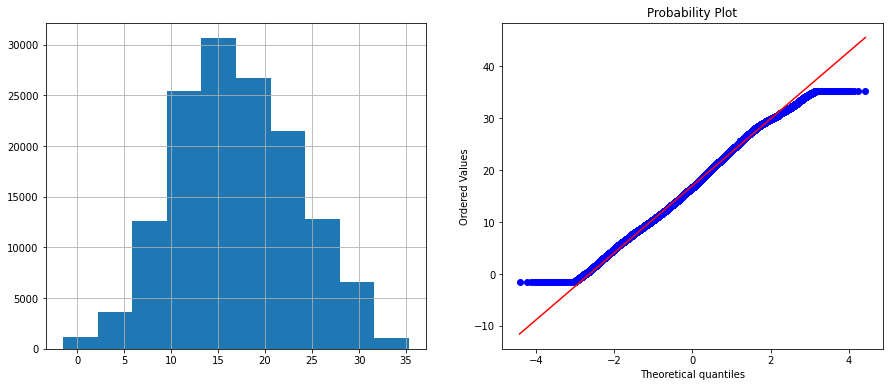

Temp3pm


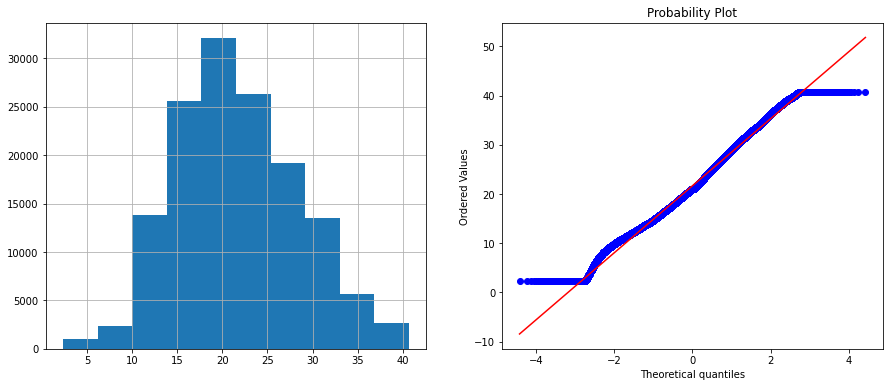

RISK_MM


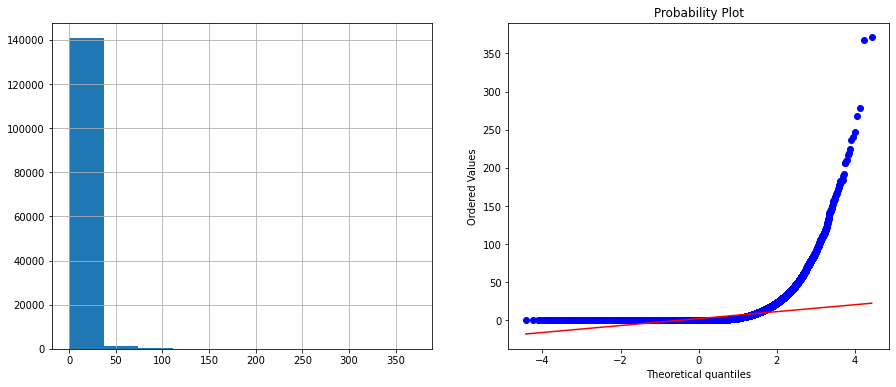

In [66]:
for feature in continuous_feature:
    print(feature)
    plt.figure(figsize=(15,6))
    plt.subplot(1, 2, 1)
    df[feature].hist()
    plt.subplot(1, 2, 2)
    stats.probplot(df[feature], dist="norm", plot=plt)
    plt.show()

In [67]:
df.to_csv("preprocessed_1.csv", index=False)

In [68]:
X = df.drop(["RainTomorrow", "Date"], axis=1)
Y = df["RainTomorrow"]

In [69]:
X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size =0.2, stratify = Y, random_state = 0)

In [70]:

y_train

1041      1
139168    0
125791    0
85966     0
134284    0
         ..
92305     1
55116     0
6311      0
18143     1
62310     0
Name: RainTomorrow, Length: 113754, dtype: uint8

In [71]:
sm=SMOTE(random_state=0)
X_train_res, y_train_res = sm.fit_resample(X_train, y_train)
print("The number of classes before fit {}".format(Counter(y_train)))
print("The number of classes after fit {}".format(Counter(y_train_res)))

The number of classes before fit Counter({0: 88252, 1: 25502})
The number of classes after fit Counter({1: 88252, 0: 88252})


In [72]:
pip install catboost

Note: you may need to restart the kernel to use updated packages.


In [73]:
import catboost
from catboost import CatBoostClassifier

In [74]:
cat = CatBoostClassifier(iterations=2000, eval_metric = "AUC")
cat.fit(X_train_res, y_train_res)

Learning rate set to 0.049688
0:	total: 211ms	remaining: 7m 1s
1:	total: 262ms	remaining: 4m 21s
2:	total: 317ms	remaining: 3m 31s
3:	total: 364ms	remaining: 3m 1s
4:	total: 410ms	remaining: 2m 43s
5:	total: 462ms	remaining: 2m 33s
6:	total: 523ms	remaining: 2m 28s
7:	total: 577ms	remaining: 2m 23s
8:	total: 645ms	remaining: 2m 22s
9:	total: 697ms	remaining: 2m 18s
10:	total: 741ms	remaining: 2m 13s
11:	total: 784ms	remaining: 2m 9s
12:	total: 829ms	remaining: 2m 6s
13:	total: 878ms	remaining: 2m 4s
14:	total: 920ms	remaining: 2m 1s
15:	total: 965ms	remaining: 1m 59s
16:	total: 1.01s	remaining: 1m 58s
17:	total: 1.06s	remaining: 1m 57s
18:	total: 1.11s	remaining: 1m 56s
19:	total: 1.16s	remaining: 1m 54s
20:	total: 1.21s	remaining: 1m 53s
21:	total: 1.25s	remaining: 1m 52s
22:	total: 1.31s	remaining: 1m 52s
23:	total: 1.36s	remaining: 1m 51s
24:	total: 1.41s	remaining: 1m 51s
25:	total: 1.46s	remaining: 1m 50s
26:	total: 1.51s	remaining: 1m 50s
27:	total: 1.55s	remaining: 1m 49s
28:	to

234:	total: 9.78s	remaining: 1m 13s
235:	total: 9.82s	remaining: 1m 13s
236:	total: 9.85s	remaining: 1m 13s
237:	total: 9.89s	remaining: 1m 13s
238:	total: 9.92s	remaining: 1m 13s
239:	total: 9.95s	remaining: 1m 12s
240:	total: 9.98s	remaining: 1m 12s
241:	total: 10s	remaining: 1m 12s
242:	total: 10s	remaining: 1m 12s
243:	total: 10.1s	remaining: 1m 12s
244:	total: 10.1s	remaining: 1m 12s
245:	total: 10.1s	remaining: 1m 12s
246:	total: 10.2s	remaining: 1m 12s
247:	total: 10.2s	remaining: 1m 12s
248:	total: 10.2s	remaining: 1m 12s
249:	total: 10.3s	remaining: 1m 11s
250:	total: 10.3s	remaining: 1m 11s
251:	total: 10.3s	remaining: 1m 11s
252:	total: 10.4s	remaining: 1m 11s
253:	total: 10.4s	remaining: 1m 11s
254:	total: 10.4s	remaining: 1m 11s
255:	total: 10.5s	remaining: 1m 11s
256:	total: 10.5s	remaining: 1m 11s
257:	total: 10.5s	remaining: 1m 11s
258:	total: 10.6s	remaining: 1m 11s
259:	total: 10.6s	remaining: 1m 11s
260:	total: 10.6s	remaining: 1m 10s
261:	total: 10.7s	remaining: 1m 

470:	total: 18s	remaining: 58.4s
471:	total: 18s	remaining: 58.3s
472:	total: 18.1s	remaining: 58.3s
473:	total: 18.1s	remaining: 58.2s
474:	total: 18.1s	remaining: 58.2s
475:	total: 18.2s	remaining: 58.2s
476:	total: 18.2s	remaining: 58.1s
477:	total: 18.3s	remaining: 58.1s
478:	total: 18.3s	remaining: 58.1s
479:	total: 18.3s	remaining: 58s
480:	total: 18.4s	remaining: 58s
481:	total: 18.4s	remaining: 58s
482:	total: 18.4s	remaining: 57.9s
483:	total: 18.5s	remaining: 57.9s
484:	total: 18.5s	remaining: 57.8s
485:	total: 18.5s	remaining: 57.7s
486:	total: 18.6s	remaining: 57.7s
487:	total: 18.6s	remaining: 57.6s
488:	total: 18.6s	remaining: 57.6s
489:	total: 18.7s	remaining: 57.5s
490:	total: 18.7s	remaining: 57.5s
491:	total: 18.7s	remaining: 57.4s
492:	total: 18.8s	remaining: 57.4s
493:	total: 18.8s	remaining: 57.3s
494:	total: 18.8s	remaining: 57.3s
495:	total: 18.9s	remaining: 57.2s
496:	total: 18.9s	remaining: 57.2s
497:	total: 18.9s	remaining: 57.2s
498:	total: 19s	remaining: 57.

708:	total: 26.4s	remaining: 48.1s
709:	total: 26.5s	remaining: 48.1s
710:	total: 26.5s	remaining: 48s
711:	total: 26.5s	remaining: 48s
712:	total: 26.6s	remaining: 47.9s
713:	total: 26.6s	remaining: 47.9s
714:	total: 26.6s	remaining: 47.9s
715:	total: 26.7s	remaining: 47.8s
716:	total: 26.7s	remaining: 47.8s
717:	total: 26.7s	remaining: 47.7s
718:	total: 26.8s	remaining: 47.7s
719:	total: 26.8s	remaining: 47.6s
720:	total: 26.8s	remaining: 47.6s
721:	total: 26.9s	remaining: 47.5s
722:	total: 26.9s	remaining: 47.5s
723:	total: 26.9s	remaining: 47.4s
724:	total: 27s	remaining: 47.4s
725:	total: 27s	remaining: 47.4s
726:	total: 27s	remaining: 47.3s
727:	total: 27s	remaining: 47.3s
728:	total: 27.1s	remaining: 47.2s
729:	total: 27.1s	remaining: 47.2s
730:	total: 27.1s	remaining: 47.1s
731:	total: 27.2s	remaining: 47.1s
732:	total: 27.2s	remaining: 47s
733:	total: 27.3s	remaining: 47s
734:	total: 27.3s	remaining: 47s
735:	total: 27.3s	remaining: 46.9s
736:	total: 27.4s	remaining: 46.9s
737

949:	total: 35.3s	remaining: 39s
950:	total: 35.3s	remaining: 39s
951:	total: 35.4s	remaining: 38.9s
952:	total: 35.4s	remaining: 38.9s
953:	total: 35.4s	remaining: 38.8s
954:	total: 35.5s	remaining: 38.8s
955:	total: 35.5s	remaining: 38.8s
956:	total: 35.5s	remaining: 38.7s
957:	total: 35.6s	remaining: 38.7s
958:	total: 35.6s	remaining: 38.7s
959:	total: 35.6s	remaining: 38.6s
960:	total: 35.7s	remaining: 38.6s
961:	total: 35.7s	remaining: 38.5s
962:	total: 35.8s	remaining: 38.5s
963:	total: 35.8s	remaining: 38.5s
964:	total: 35.8s	remaining: 38.4s
965:	total: 35.8s	remaining: 38.4s
966:	total: 35.9s	remaining: 38.3s
967:	total: 35.9s	remaining: 38.3s
968:	total: 35.9s	remaining: 38.2s
969:	total: 36s	remaining: 38.2s
970:	total: 36s	remaining: 38.1s
971:	total: 36s	remaining: 38.1s
972:	total: 36s	remaining: 38s
973:	total: 36.1s	remaining: 38s
974:	total: 36.1s	remaining: 37.9s
975:	total: 36.1s	remaining: 37.9s
976:	total: 36.1s	remaining: 37.8s
977:	total: 36.2s	remaining: 37.8s
9

1186:	total: 42.5s	remaining: 29.1s
1187:	total: 42.5s	remaining: 29.1s
1188:	total: 42.5s	remaining: 29s
1189:	total: 42.6s	remaining: 29s
1190:	total: 42.6s	remaining: 29s
1191:	total: 42.7s	remaining: 28.9s
1192:	total: 42.7s	remaining: 28.9s
1193:	total: 42.7s	remaining: 28.9s
1194:	total: 42.8s	remaining: 28.8s
1195:	total: 42.8s	remaining: 28.8s
1196:	total: 42.9s	remaining: 28.7s
1197:	total: 42.9s	remaining: 28.7s
1198:	total: 42.9s	remaining: 28.7s
1199:	total: 42.9s	remaining: 28.6s
1200:	total: 43s	remaining: 28.6s
1201:	total: 43s	remaining: 28.5s
1202:	total: 43s	remaining: 28.5s
1203:	total: 43s	remaining: 28.5s
1204:	total: 43.1s	remaining: 28.4s
1205:	total: 43.1s	remaining: 28.4s
1206:	total: 43.1s	remaining: 28.3s
1207:	total: 43.2s	remaining: 28.3s
1208:	total: 43.2s	remaining: 28.2s
1209:	total: 43.2s	remaining: 28.2s
1210:	total: 43.2s	remaining: 28.2s
1211:	total: 43.3s	remaining: 28.1s
1212:	total: 43.3s	remaining: 28.1s
1213:	total: 43.3s	remaining: 28s
1214:	to

1418:	total: 49.5s	remaining: 20.3s
1419:	total: 49.6s	remaining: 20.2s
1420:	total: 49.6s	remaining: 20.2s
1421:	total: 49.7s	remaining: 20.2s
1422:	total: 49.7s	remaining: 20.1s
1423:	total: 49.7s	remaining: 20.1s
1424:	total: 49.8s	remaining: 20.1s
1425:	total: 49.8s	remaining: 20.1s
1426:	total: 49.9s	remaining: 20s
1427:	total: 49.9s	remaining: 20s
1428:	total: 49.9s	remaining: 20s
1429:	total: 50s	remaining: 19.9s
1430:	total: 50s	remaining: 19.9s
1431:	total: 50.1s	remaining: 19.9s
1432:	total: 50.1s	remaining: 19.8s
1433:	total: 50.2s	remaining: 19.8s
1434:	total: 50.2s	remaining: 19.8s
1435:	total: 50.2s	remaining: 19.7s
1436:	total: 50.3s	remaining: 19.7s
1437:	total: 50.3s	remaining: 19.7s
1438:	total: 50.3s	remaining: 19.6s
1439:	total: 50.4s	remaining: 19.6s
1440:	total: 50.4s	remaining: 19.6s
1441:	total: 50.5s	remaining: 19.5s
1442:	total: 50.5s	remaining: 19.5s
1443:	total: 50.5s	remaining: 19.5s
1444:	total: 50.6s	remaining: 19.4s
1445:	total: 50.6s	remaining: 19.4s
14

1649:	total: 57.5s	remaining: 12.2s
1650:	total: 57.5s	remaining: 12.2s
1651:	total: 57.6s	remaining: 12.1s
1652:	total: 57.6s	remaining: 12.1s
1653:	total: 57.6s	remaining: 12.1s
1654:	total: 57.7s	remaining: 12s
1655:	total: 57.7s	remaining: 12s
1656:	total: 57.8s	remaining: 12s
1657:	total: 57.8s	remaining: 11.9s
1658:	total: 57.8s	remaining: 11.9s
1659:	total: 57.9s	remaining: 11.9s
1660:	total: 57.9s	remaining: 11.8s
1661:	total: 57.9s	remaining: 11.8s
1662:	total: 58s	remaining: 11.7s
1663:	total: 58s	remaining: 11.7s
1664:	total: 58s	remaining: 11.7s
1665:	total: 58.1s	remaining: 11.6s
1666:	total: 58.1s	remaining: 11.6s
1667:	total: 58.1s	remaining: 11.6s
1668:	total: 58.2s	remaining: 11.5s
1669:	total: 58.2s	remaining: 11.5s
1670:	total: 58.2s	remaining: 11.5s
1671:	total: 58.3s	remaining: 11.4s
1672:	total: 58.3s	remaining: 11.4s
1673:	total: 58.3s	remaining: 11.4s
1674:	total: 58.4s	remaining: 11.3s
1675:	total: 58.4s	remaining: 11.3s
1676:	total: 58.4s	remaining: 11.3s
1677

1881:	total: 1m 4s	remaining: 4.05s
1882:	total: 1m 4s	remaining: 4.02s
1883:	total: 1m 4s	remaining: 3.98s
1884:	total: 1m 4s	remaining: 3.95s
1885:	total: 1m 4s	remaining: 3.91s
1886:	total: 1m 4s	remaining: 3.88s
1887:	total: 1m 4s	remaining: 3.84s
1888:	total: 1m 4s	remaining: 3.81s
1889:	total: 1m 4s	remaining: 3.77s
1890:	total: 1m 4s	remaining: 3.74s
1891:	total: 1m 4s	remaining: 3.7s
1892:	total: 1m 4s	remaining: 3.67s
1893:	total: 1m 4s	remaining: 3.63s
1894:	total: 1m 4s	remaining: 3.6s
1895:	total: 1m 5s	remaining: 3.57s
1896:	total: 1m 5s	remaining: 3.53s
1897:	total: 1m 5s	remaining: 3.5s
1898:	total: 1m 5s	remaining: 3.46s
1899:	total: 1m 5s	remaining: 3.43s
1900:	total: 1m 5s	remaining: 3.39s
1901:	total: 1m 5s	remaining: 3.36s
1902:	total: 1m 5s	remaining: 3.32s
1903:	total: 1m 5s	remaining: 3.29s
1904:	total: 1m 5s	remaining: 3.25s
1905:	total: 1m 5s	remaining: 3.22s
1906:	total: 1m 5s	remaining: 3.18s
1907:	total: 1m 5s	remaining: 3.15s
1908:	total: 1m 5s	remaining: 3

In [75]:
y_pred = cat.predict(X_test)
print(confusion_matrix(y_test,y_pred))
print(accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[22064     0]
 [    0  6375]]
1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     22064
           1       1.00      1.00      1.00      6375

    accuracy                           1.00     28439
   macro avg       1.00      1.00      1.00     28439
weighted avg       1.00      1.00      1.00     28439



1.0

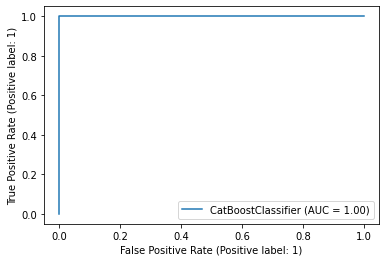

In [76]:
metrics.plot_roc_curve(cat, X_test, y_test)
metrics.roc_auc_score(y_test, y_pred, average=None)

In [77]:
rf=RandomForestClassifier()
rf.fit(X_train_res,y_train_res)

RandomForestClassifier()

In [78]:
y_pred1 = rf.predict(X_test)
print(confusion_matrix(y_test,y_pred1))
print(accuracy_score(y_test,y_pred1))
print(classification_report(y_test,y_pred1))

[[22064     0]
 [    0  6375]]
1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     22064
           1       1.00      1.00      1.00      6375

    accuracy                           1.00     28439
   macro avg       1.00      1.00      1.00     28439
weighted avg       1.00      1.00      1.00     28439



1.0

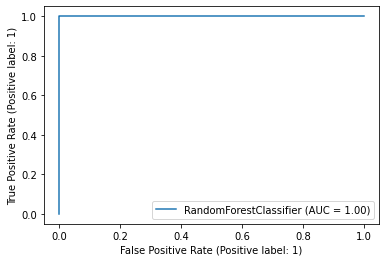

In [79]:
metrics.plot_roc_curve(rf, X_test, y_test)
metrics.roc_auc_score(y_test, y_pred1, average=None)

In [80]:
logreg = LogisticRegression()
logreg.fit(X_train_res, y_train_res)

C:\Users\Dell\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression()

In [81]:
y_pred2 = logreg.predict(X_test)
print(confusion_matrix(y_test,y_pred2))
print(accuracy_score(y_test,y_pred2))
print(classification_report(y_test,y_pred2))

[[21883   181]
 [  101  6274]]
0.99008403952319
              precision    recall  f1-score   support

           0       1.00      0.99      0.99     22064
           1       0.97      0.98      0.98      6375

    accuracy                           0.99     28439
   macro avg       0.98      0.99      0.99     28439
weighted avg       0.99      0.99      0.99     28439



0.987976727239119

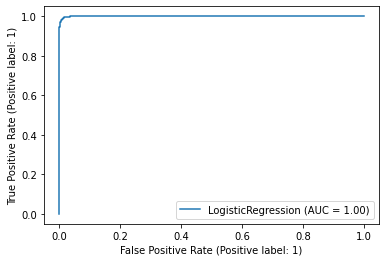

In [82]:
metrics.plot_roc_curve(logreg, X_test, y_test)
metrics.roc_auc_score(y_test, y_pred2, average=None)

In [83]:
gnb = GaussianNB()
gnb.fit(X_train_res, y_train_res)

GaussianNB()

In [84]:
y_pred3 = gnb.predict(X_test)
print(confusion_matrix(y_test,y_pred3))
print(accuracy_score(y_test,y_pred3))
print(classification_report(y_test,y_pred3))

[[19857  2207]
 [    0  6375]]
0.9223953022258167
              precision    recall  f1-score   support

           0       1.00      0.90      0.95     22064
           1       0.74      1.00      0.85      6375

    accuracy                           0.92     28439
   macro avg       0.87      0.95      0.90     28439
weighted avg       0.94      0.92      0.93     28439



0.9499864031907179

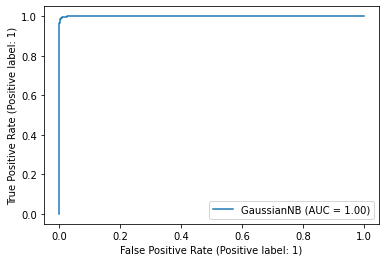

In [85]:
metrics.plot_roc_curve(gnb, X_test, y_test)
metrics.roc_auc_score(y_test, y_pred3, average=None)

In [86]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train_res, y_train_res)

KNeighborsClassifier(n_neighbors=3)

In [87]:
y_pred4 = knn.predict(X_test)
print(confusion_matrix(y_test,y_pred4))
print(accuracy_score(y_test,y_pred4))
print(classification_report(y_test,y_pred4))

[[18491  3573]
 [ 1444  4931]]
0.8235873272618587
              precision    recall  f1-score   support

           0       0.93      0.84      0.88     22064
           1       0.58      0.77      0.66      6375

    accuracy                           0.82     28439
   macro avg       0.75      0.81      0.77     28439
weighted avg       0.85      0.82      0.83     28439



0.805776098764379

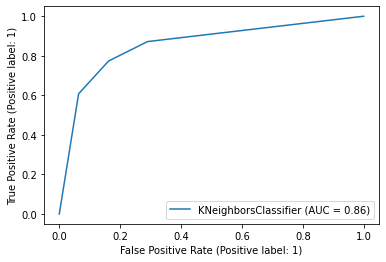

In [88]:
metrics.plot_roc_curve(knn, X_test, y_test)
metrics.roc_auc_score(y_test, y_pred4, average=None)

In [89]:
xgb = XGBClassifier()
xgb.fit(X_train_res, y_train_res)

C:\Users\Dell\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[01:26:38] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=8, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [90]:
y_pred6 = xgb.predict(X_test)
print(confusion_matrix(y_test,y_pred6))
print(accuracy_score(y_test,y_pred6))
print(classification_report(y_test,y_pred6))

[[22064     0]
 [    0  6375]]
1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     22064
           1       1.00      1.00      1.00      6375

    accuracy                           1.00     28439
   macro avg       1.00      1.00      1.00     28439
weighted avg       1.00      1.00      1.00     28439



1.0

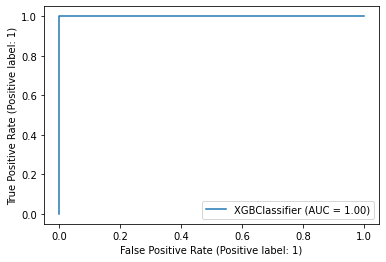

In [91]:
metrics.plot_roc_curve(xgb, X_test, y_test)
metrics.roc_auc_score(y_test, y_pred6, average=None)

In [92]:
joblib.dump(rf, "rf.pkl")
joblib.dump(cat, "cat.pkl")
joblib.dump(logreg, "logreg.pkl")
joblib.dump(gnb, "gnb.pkl")
joblib.dump(knn, "knn.pkl")
joblib.dump(xgb, "xgb.pkl")

['xgb.pkl']